In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MedHighWeeklyCount.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57595 entries, 0 to 57594
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            57595 non-null  datetime64[ns]
 1   Count           57595 non-null  int64         
 2   Date.1          57595 non-null  object        
 3   Census_Tracts   57595 non-null  float64       
 4   PoliceDistrict  57595 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [3]:
ND_tract = pd.read_csv('Tract_ND.csv')
ND_tract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   New_district   200 non-null    float64
 1   census_tracts  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
ND = []
for idx in df.index:
    ct = df.Census_Tracts[idx]
    xx = (ND_tract[ND_tract['census_tracts']==float(ct)].New_district.values[0])
    ND.append(xx)
    
df['New District']=ND

In [5]:
NDs = df['New District'].unique()
dfAgg = pd.DataFrame()
for nd in NDs:
    Temp = df[df['New District']==nd]
    dfSum = Temp['Count'].groupby(Temp['Date'].dt.date).sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index    
    dfTemp['NewDistrict'] = nd
    dfAgg = dfAgg.append(dfTemp)   
    
dfAgg['Date']= pd.to_datetime(dfAgg['Date'])
dfAgg

,Count,Date,NewDistrict
Date,,,
2013-07-07,1762,2013-07-07,0.0
2013-07-14,1599,2013-07-14,0.0
2013-07-21,1497,2013-07-21,0.0
2013-07-28,1521,2013-07-28,0.0
2013-08-04,1606,2013-08-04,0.0
...,...,...,...
2018-12-09,1405,2018-12-09,3.0
2018-12-16,1369,2018-12-16,3.0
2018-12-23,1530,2018-12-23,3.0


In [6]:
dfAgg = dfAgg[(dfAgg['Date'].dt.year < 2019) & (dfAgg['Date'] > '2013-7-6')]

In [7]:
dfNew=pd.DataFrame()
labels = ['D0','D1','D2','D3','D4','D5','D6','D7','D8']
dfNew['Date']=dfAgg[dfAgg['NewDistrict']==0].Date
for i in range(0,9):
    dfTemp = dfAgg[dfAgg['NewDistrict']==i]
    dfNew[labels[i]] = dfTemp['Count']
    
dfNew['Total'] = dfNew.drop(columns=['Date']).sum(axis=1)
dfNew

,Date,D0,D1,D2,D3,D4,D5,D6,D7,D8,Total
Date,,,,,,,,,,,
2013-07-07,2013-07-07,1762,1382,1561,1639,1218,1777,1555,1235,1335,13464
2013-07-14,2013-07-14,1599,1278,1260,1526,1091,1533,1376,1220,1232,12115
2013-07-21,2013-07-21,1497,1307,1322,1564,1067,1542,1474,1194,1255,12222
2013-07-28,2013-07-28,1521,1292,1253,1708,1109,1674,1459,1242,1399,12657
2013-08-04,2013-08-04,1606,1190,1263,1523,1071,1566,1449,1212,1305,12185
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-02,2018-12-02,1287,1172,1273,1461,1100,1621,1088,1301,1409,11712
2018-12-09,2018-12-09,1397,1152,1264,1405,1155,1512,1160,1314,1360,11719
2018-12-16,2018-12-16,1371,1131,1288,1369,1151,1598,1135,1276,1249,11568


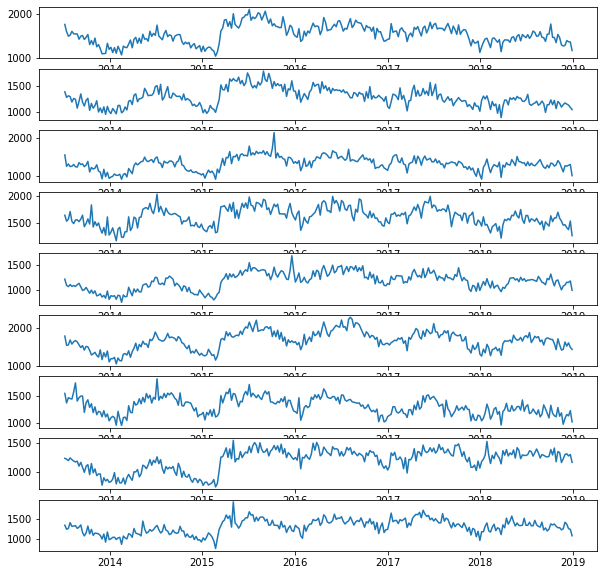

In [8]:
fig, ax = plt.subplots(9,1,figsize=(10, 10))
for i in range(0,9):
    ax[i].plot_date(dfNew.Date, dfNew[labels[i]], linestyle = '-', marker = '')
#     ax[i].set_ylim(0,)

In [9]:
df = pd.read_csv('C:/Users/tsen6/Desktop/Python/Analysis911/911_Police_Calls_for_Service.csv')
df['Count']=1
df['CallDateTime']=pd.to_datetime(df['CallDateTime'])
df = df.dropna(subset=['Census_Tracts'])
df = df.dropna(subset=['PoliceDistrict'])

C:\Users\tsen6\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
def cen_tract(tract_string):
    tract = float(tract_string.split()[2])
    return tract

dfAct = df[['CallDateTime','Priority','PoliceDistrict','Census_Tracts','Count']]
dfAct.Census_Tracts = dfAct.apply(lambda x: cen_tract(x['Census_Tracts']),axis=1)
dfAct

C:\Users\tsen6\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CallDateTime,Priority,PoliceDistrict,Census_Tracts,Count
0,2019-02-22 10:08:00,Non-Emergency,Western,1503.00,1
1,2019-04-11 10:45:00,Non-Emergency,Southwestern,1506.00,1
2,2019-04-11 10:45:00,Non-Emergency,Southern,1803.00,1
4,2019-04-11 07:22:00,Non-Emergency,Southern,2003.00,1
5,2019-04-11 08:01:00,Medium,Western,1501.00,1
...,...,...,...,...,...
7823485,2013-07-30 19:23:00,Medium,Western,1605.00,1
7823486,2013-07-30 22:01:00,Low,Southwestern,1606.00,1
7823487,2013-07-30 20:57:00,Medium,Western,1901.00,1
7823488,2013-07-30 20:37:00,Low,Central,401.00,1


In [11]:
PD_tract = pd.read_csv('Tract_PD.csv')

In [12]:
dfWeek = pd.DataFrame()
for cd in dfAct.Census_Tracts.unique():    
    PD = PD_tract[PD_tract['census_tracts']==cd].Police_district
    policeD = (PD.tolist()[0])
    ND = ND_tract[ND_tract['census_tracts']==cd].New_district
    newD = (ND.tolist()[0])
    
    Temp = dfAct[(dfAct['Census_Tracts']==cd)]
    dfSum = Temp.groupby(pd.Grouper(key='CallDateTime', freq='W'))['Count'].sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index
    dfTemp['Census_Tracts'] = cd
    dfTemp['PoliceDistrict'] = policeD    
    dfTemp['New_district'] = newD
    
    dfWeek = dfWeek.append(dfTemp)

In [66]:
dfWeekAll = pd.DataFrame()
for cd in dfAct.Census_Tracts.unique():    
    PD = PD_tract[PD_tract['census_tracts']==cd].Police_district
    policeD = (PD.tolist()[0])
    ND = ND_tract[ND_tract['census_tracts']==cd].New_district
    newD = (ND.tolist()[0])
    
    Temp = dfAct[(dfAct['Census_Tracts']==cd)] #& (dfAct['Priority']=='High')]
    dfSum = Temp.groupby(pd.Grouper(key='CallDateTime', freq='W'))['Count'].sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index
    dfTemp['Census_Tracts'] = cd
    dfTemp['PoliceDistrict'] = policeD    
    dfTemp['New_district'] = newD
    
    dfWeekAll = dfWeekAll.append(dfTemp)
dfWeekAll

,Count,Date,Census_Tracts,PoliceDistrict,New_district
CallDateTime,,,,,
2013-07-07,62,2013-07-07,1503.00,Western,6.0
2013-07-14,53,2013-07-14,1503.00,Western,6.0
2013-07-21,76,2013-07-21,1503.00,Western,6.0
2013-07-28,59,2013-07-28,1503.00,Western,6.0
2013-08-04,68,2013-08-04,1503.00,Western,6.0
...,...,...,...,...,...
2020-05-10,22,2020-05-10,2720.05,Northwestern,3.0
2020-05-17,49,2020-05-17,2720.05,Northwestern,3.0
2020-05-24,40,2020-05-24,2720.05,Northwestern,3.0


In [67]:
NDs = ND_tract['New_district'].unique()
dfAgg = pd.DataFrame()
for nd in NDs:
    Temp = dfWeekAll[dfWeekAll['New_district']==nd]
    dfSum = Temp['Count'].groupby(Temp['Date'].dt.date).sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index    
    dfTemp['New_district'] = nd
    dfAgg = dfAgg.append(dfTemp)   
    
dfAgg['Date']= pd.to_datetime(dfAgg['Date'])
dfAgg

,Count,Date,New_district
Date,,,
2013-06-30,1,2013-06-30,3.0
2013-07-07,2704,2013-07-07,3.0
2013-07-14,2656,2013-07-14,3.0
2013-07-21,2692,2013-07-21,3.0
2013-07-28,2890,2013-07-28,3.0
...,...,...,...
2020-05-10,2849,2020-05-10,6.0
2020-05-17,2717,2020-05-17,6.0
2020-05-24,2946,2020-05-24,6.0


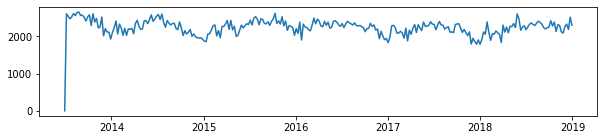

In [377]:
# dfAgg = dfAgg[dfAgg['Date'] < '2018-12-31']
# dfAgg = dfAgg[dfAgg['Date'] > '2013-07-28']
dfTemp = dfAgg[dfAgg['New_district']==7]
# dfTemp = dfTemp[dfTemp['Date'] < '2018-12-31']

# dfTemp = dfTemp[dfTemp['Date'].dt.year<2019]

fig,ax = plt.subplots(1,1,figsize=(10, 2))
ax.plot_date(dfTemp.Date, dfTemp['Count'], linestyle = '-', marker = '')

In [16]:
dfNew
# fig, ax = plt.subplots(9,1,figsize=(10, 10))
# for i in range(0,9):
#     ax[i].plot_date(dfNew.Date, dfNew[labels[i]], linestyle = '-', marker = '')
# #     ax[i].set_ylim(0,)

,Date,D0,D1,D2,D3,D4,D5,D6,D7,D8,Total
Date,,,,,,,,,,,
2013-07-07,2013-07-07,1762,1382,1561,1639,1218,1777,1555,1235,1335,13464
2013-07-14,2013-07-14,1599,1278,1260,1526,1091,1533,1376,1220,1232,12115
2013-07-21,2013-07-21,1497,1307,1322,1564,1067,1542,1474,1194,1255,12222
2013-07-28,2013-07-28,1521,1292,1253,1708,1109,1674,1459,1242,1399,12657
2013-08-04,2013-08-04,1606,1190,1263,1523,1071,1566,1449,1212,1305,12185
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-02,2018-12-02,1287,1172,1273,1461,1100,1621,1088,1301,1409,11712
2018-12-09,2018-12-09,1397,1152,1264,1405,1155,1512,1160,1314,1360,11719
2018-12-16,2018-12-16,1371,1131,1288,1369,1151,1598,1135,1276,1249,11568


In [69]:
import requests
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from io import BytesIO
import numpy as np

In [18]:
# # Dataset
# wpi1 = requests.get('https://www.stata-press.com/data/r12/wpi1.dta').content
# data = pd.read_stata(BytesIO(wpi1))
# data.index = data.t
# Set the frequency
# data.index.freq="QS-OCT"

# # Fit the model
# mod = sm.tsa.statespace.SARIMAX(data['wpi'], trend='c', order=(1,1,1))
# res = mod.fit(disp=False)
# print(res.summary())

In [76]:
dfAgg = dfAgg[dfAgg['Date'].dt.year < 2019]

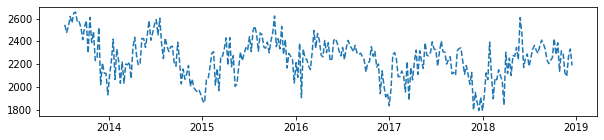

In [77]:
data = dfAgg[dfAgg['New_district']==7]
data = data[2:-2]

fig, ax = plt.subplots(1,1,figsize=(10, 2))
# ax.plot_date(dfTest.index, dfTest[0], linestyle = '-', marker = '')
ax.plot_date(data.index, data['Count'], linestyle = '--', marker = '')
means = data['Count'].groupby(data['Date'].dt.year).mean()
# for i in 

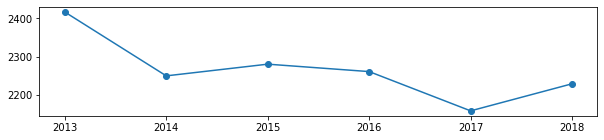

In [79]:
fig, ax = plt.subplots(1,1,figsize=(10, 2))
ax.plot(np.arange(2013,2019),means,marker='o')

In [ ]:
# subtracting annual trend from the data
data = dfAgg[dfAgg['New_district']==7]
data = data[2:-2]
data['Dmean']=1

mean_val = []
std_val = []
yin = []
for year in range(2013,2021):
    x = data[(data['Date'].dt.year==year)].Count.mean()
    std = data[(data['Date'].dt.year==year)].Count.std()
    mean_val.append(x)
    std_val.append(std)
    yin.append(year)
#     x = (means[year])
    y = ((data[data['Date'].dt.year==year].Count-x)).to_numpy()
    data.loc[data.Date.dt.year==year,'Dmean'] = y
data

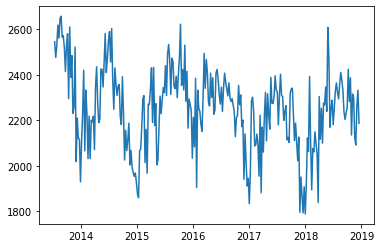

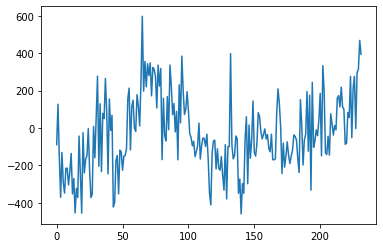

ADF Statistic: -2.649101
p-value: 0.083268
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


C:\Users\tsen6\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Count,Date,New_district,Dmean,Diff
Date,,,,,
2014-07-13,2457,2014-07-13,7.0,206.596154,-89
2014-07-20,2604,2014-07-20,7.0,353.596154,127
2014-07-27,2377,2014-07-27,7.0,126.596154,-153
2014-08-03,2249,2014-08-03,7.0,-1.403846,-370
2014-08-10,2431,2014-08-10,7.0,180.596154,-131
...,...,...,...,...,...
2018-11-18,2124,2018-11-18,7.0,-105.800000,-3
2018-11-25,2092,2018-11-25,7.0,-137.800000,296
2018-12-02,2265,2018-12-02,7.0,35.200000,314


In [139]:
import matplotlib.pyplot as plt
#removing seasonality from data
data0 = data['Count']

diff = []
weeks_in_year = 52
for i in range(weeks_in_year, len(data0)):
    value = (data0[i] - data0[i - weeks_in_year])
    diff.append(value)

# diff = np.log(diff)
#Data
plt.plot(data0)
plt.show()

diff = difference(data0, 52)
plt.plot(diff)
plt.show()

from statsmodels.tsa.stattools import adfuller
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
# X = series.values
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

data0 = data[weeks_in_year:]
data0['Diff']=diff
data0

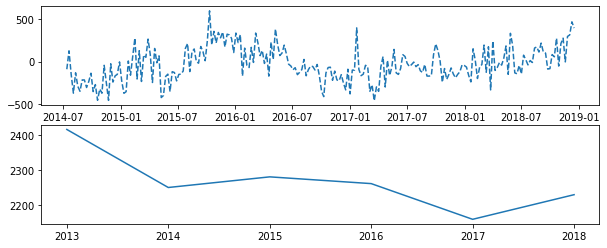

In [141]:
fig, ax = plt.subplots(2,1,figsize=(10, 4))
# ax.plot_date(dfTest.index, dfTest[0], linestyle = '-', marker = '')
ax[0].plot_date(data0.index, data0['Diff'], linestyle = '--', marker = '')
ax[1].plot(yin,mean_val)

In [355]:
#Hyperparameter tuning
df2Use = data0
data_train = df2Use[df2Use['Date']<'2018-06-01']
# Set the frequency
data_train.index.freq="W"
df2Use.index.freq = "W"

In [351]:
# from warnings import catch_warnings
# from warnings import filterwarnings
# import itertools#set parameter range

# p = range(0,3)
# q = range(1,2)
# d = range(1,2)
# s = range(52,53)# list of all parameter combos
# pdq = list(itertools.product(p, d, q))
# P = range(1,2)
# D = range(2,3)
# Q = range(1,2)
# seasonal_pdq = list(itertools.product(P, D, Q, s))# SARIMA model pipeline
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:            
#             with catch_warnings():
#                 filterwarnings("ignore")
#                 mod = sm.tsa.statespace.SARIMAX(data_train['Dmean'],
#                                         order=param,
#                                         seasonal_order=param_seasonal)
#                 results = mod.fit(max_iter = 50, method = 'powell')
#                 print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

In [356]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Fit the model
mod = ARIMA(data_train['Diff'], order=(2,1,1)) #,trend ='ct',
                                #seasonal_order=(2,1,1,52))
res = mod.fit()

C:\Users\tsen6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\tsen6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ValueError: Found input variables with inconsistent numbers of samples: [138, 141]

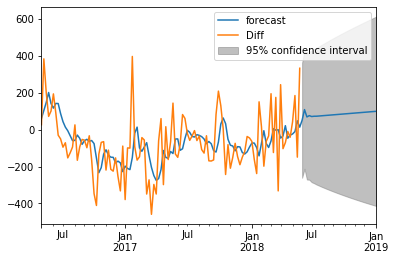

In [366]:
data_train

# # one step forecast
yPred = res.predict(start='2016-05-01',end='2019-01-01')
res.plot_predict(start='2016-05-01',end='2019-01-01')
dfTest = pd.DataFrame(data = yPred)
# (res.predict(start='2016-07-01', end = '2018-12-16')))

# fig, ax = plt.subplots(1,1,figsize=(10, 2))
# ax.plot_date(df2Use.index, df2Use['Diff'], linestyle = '--', marker = '')
# ax.plot_date(dfTest.index, dfTest[0], linestyle = '-', marker = '')
# res.plot_predict(len(train)-10, len(train)+1)
# # # ax.set_ylim(-200,200)
# # #     ax[i].set_ylim(0,)

# # # # root mean squared error or rmse
# # # def measure_rmse(actual, predicted):
# # # #     error = np.mean((actual-predicted)/actual)
# # #     return sqrt(mean_squared_error(actual, predicted))

rmse = measure_rmse(df2Use[(df2Use.Date >= '2016-05-01') 
                         & (df2Use.Date <= '2019-01-07')]['Diff'], yPred)

print(rmse)

# fig, ax = plt.subplots(2,1)
# fig = sm.graphics.tsa.plot_acf(data_train['Dmean'], lags=100, ax=ax[0])
# fig = sm.graphics.tsa.plot_pacf(data_train['Dmean'], lags=100, ax=ax[1])
# plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\tsen6\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3331: RuntimeWarning: '<' not supported between instances of 'datetime.date' and 'int', sort order is undefined for incomparable objects
  join_index = self.union(other)


nan

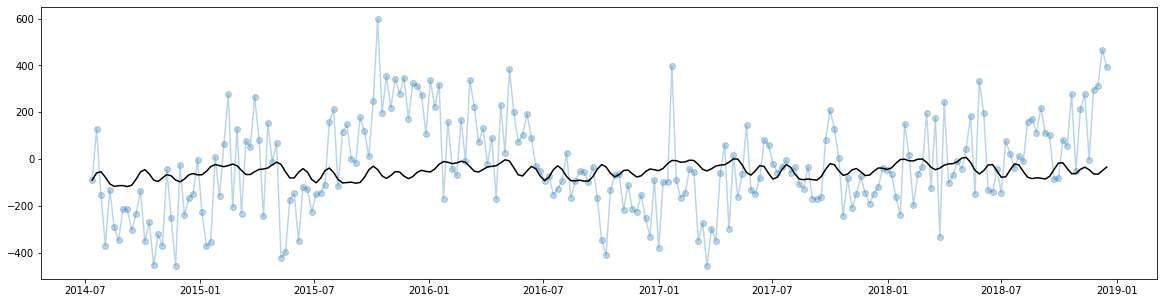

In [171]:
import fbprophet

dfX = df2Use
dfX = dfX.rename(columns={'Date': 'ds', 'Diff': 'y'})
dfTrain = dfX[dfX['ds'].dt.year < 2018]
dfTest = dfX[dfX['ds'].dt.year == 2018]

# Make the prophet model and fit on the data
dis05_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
dis05_prophet.fit(dfTrain)

# Make predictions
dfPred = dis05_prophet.predict(dfX)
# dis05_prophet.plot(dfPred, xlabel = 'Date', ylabel = '911 call volume')

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(dfX.ds[-300:], dfX.y[-300:], alpha=0.3, linestyle='-')
ax.plot_date(dfPred.ds[-300:], dfPred.yhat[-300:],color='black',linestyle='-',marker='')

# dfX = dfX.reset_index().drop(columns = 'CallDateTime')
# dfPred.loc[:, 'yhat'] 
# dfX.loc[:,'y']
se = np.square((dfPred.loc[:, 'yhat'] - dfX.loc[:,'y'])/dfX.loc[:,'y'])
mse = np.mean(se)
rmse = np.sqrt(mse)*100
rmse

In [346]:
# def week_of_month(week, month):
#     base = 5
#     x = float(week)
#     y = str(base * round(x/base))
#     return y

#implementing Poisson regression
data['Month'] = data['Date'].dt.strftime('%m')
data['Week'] = data['Date'].dt.strftime('%W')
data['Year'] = data['Date'].dt.strftime('%Y').astype(float)-2013

data['Week'] = data.apply(lambda x: week_of_month(x['Week'],x['Month']),axis=1) 
idx = len(data[data['Date']<'2018-01-01'].index)
# dfFit = OneHotEncoder.fit(X)

In [347]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """Count ~ Year + Week + Month"""
y, X = dmatrices(expr, data, return_type='dataframe')
y_train = y[0:234]
y_test = y[235:]
X_train = X[0:234]
X_test = X[235:]
# y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [348]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
# print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2018-01-14  2009.353511  13.774812    1982.535944    2036.533838
2018-01-21  2062.486589  18.796762    2025.972696    2099.658569
2018-01-28  2062.486589  18.796762    2025.972696    2099.658569
2018-02-04  2073.845212  13.293625    2047.953175    2100.064599
2018-02-11  2073.845212  13.293625    2047.953175    2100.064599
2018-02-18  2073.845212  13.293625    2047.953175    2100.064599
2018-02-25  2061.551746  31.809715    2000.139158    2124.849956
2018-03-04  2086.352202  12.074652    2062.820036    2110.152817
2018-03-11  2086.352202  12.074652    2062.820036    2110.152817
2018-03-18  2086.352202  12.074652    2062.820036    2110.152817
2018-03-25  2086.352202  12.074652    2062.820036    2110.152817
2018-04-01  2179.302276  12.472142    2154.993914    2203.884837
2018-04-08  2179.302276  12.472142    2154.993914    2203.884837
2018-04-15  2179.302276  

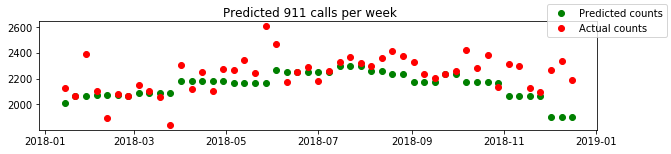

In [349]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Count']
fig, ax = plt.subplots(1,1,figsize=(10, 2))
fig.suptitle('Predicted 911 calls per week')
predicted, = plt.plot(X_test.index, predicted_counts, 'go', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro', label='Actual counts')
fig.legend(handles=[predicted, actual])
plt.show()

In [324]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                  222
Model:                            GLM   Df Residuals:                      201
Model Family:                 Poisson   Df Model:                           20
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1921.7
Date:                Wed, 10 Jun 2020   Deviance:                       1722.4
Time:                        22:16:31   Pearson chi2:                 1.72e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.6055      0.007   1022.735      

In [369]:
import os
from pprint import pprint
import importlib

import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from pandas.core.common import SettingWithCopyWarning


import warnings

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

%matplotlib inline
%load_ext autoreload
%autoreload 2


%matplotlib inline

In [378]:
dfWeek

,Count,Date,Census_Tracts,PoliceDistrict,New_district
CallDateTime,,,,,
2013-07-07,62,2013-07-07,1503.00,Western,6.0
2013-07-14,53,2013-07-14,1503.00,Western,6.0
2013-07-21,76,2013-07-21,1503.00,Western,6.0
2013-07-28,59,2013-07-28,1503.00,Western,6.0
2013-08-04,68,2013-08-04,1503.00,Western,6.0
...,...,...,...,...,...
2020-05-10,22,2020-05-10,2720.05,Northwestern,3.0
2020-05-17,49,2020-05-17,2720.05,Northwestern,3.0
2020-05-24,40,2020-05-24,2720.05,Northwestern,3.0


In [442]:
dfNew=pd.DataFrame()
labels0 = dfWeek.Census_Tracts.unique().astype(str).tolist()
labels = dfWeek.New_district.unique().astype(str).tolist()
# labels = labels + labels0

dfhts = pd.DataFrame()
dfhts['total'] = dfWeek.groupby(pd.Grouper(key='Date', freq='W'))['Count'].sum()

for i in range(0,len(dfWeek.New_district.unique())):
    ND = dfWeek.New_district.unique()[i]
    newLabel = labels[i]
    Temp = dfWeek[dfWeek['New_district']==ND]
    dfhts[newLabel] = Temp.groupby(pd.Grouper(key='Date', freq='W'))['Count'].sum()

for i in range(0,len(dfWeek.Census_Tracts.unique())):
    CT = dfWeek.Census_Tracts.unique()[i]
    newLabel = labels0[i]
    Temp = dfWeek[dfWeek['Census_Tracts']==CT]
    dfhts[newLabel] = Temp.groupby(pd.Grouper(key='Date', freq='W'))['Count'].sum()


# dfNew['Date']=dfAgg[dfAgg['NewDistrict']==0].Date
# for i in range(0,9):
#     dfTemp = dfAgg[dfAgg['NewDistrict']==i]
#     dfNew[labels[i]] = dfTemp['Count']
    
# dfNew['Total'] = dfNew.drop(columns=['Date']).sum(axis=1)
# dfNew

In [653]:
dfhts = dfhts[1:-1]
dfhts.to_csv('ProcessedHTS.csv')
dfhts

,total,6.0,3.0,8.0,7.0,0.0,4.0,5.0,1.0,2.0,...,2502.04,102.0,2707.02,2403.0,2707.01,2303.0,1308.04,2715.03,2703.02,2720.05
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-14,21775,2340.0,2656,2269,2546,2948.0,1976.0,2625,2042,2373.0,...,103.0,68.0,69.0,21.0,33.0,64.0,55.0,37.0,23.0,30.0
2013-07-21,21756,2400.0,2692,2194,2477,2863.0,1963.0,2780,2040,2347.0,...,110.0,48.0,71.0,16.0,40.0,45.0,59.0,48.0,12.0,16.0
2013-07-28,22491,2376.0,2890,2514,2530,2894.0,1969.0,2926,2094,2298.0,...,123.0,76.0,87.0,22.0,21.0,52.0,68.0,47.0,14.0,11.0
2013-08-04,21678,2433.0,2623,2346,2619,2903.0,1876.0,2788,1949,2141.0,...,109.0,60.0,90.0,19.0,37.0,51.0,44.0,37.0,14.0,11.0
2013-08-11,22656,2619.0,2663,2385,2562,2989.0,2019.0,2933,2122,2364.0,...,107.0,69.0,113.0,36.0,41.0,51.0,78.0,36.0,17.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26,25385,2410.0,3458,3113,2902,2232.0,2602.0,3137,2674,2857.0,...,87.0,15.0,93.0,36.0,29.0,33.0,32.0,16.0,32.0,26.0
2020-05-03,26411,2443.0,3455,3411,2908,2527.0,2603.0,3490,2634,2940.0,...,115.0,29.0,80.0,37.0,29.0,40.0,31.0,15.0,30.0,30.0
2020-05-10,27327,2849.0,4309,3446,2836,2453.0,2610.0,3616,2399,2809.0,...,117.0,29.0,66.0,46.0,34.0,26.0,32.0,10.0,36.0,22.0


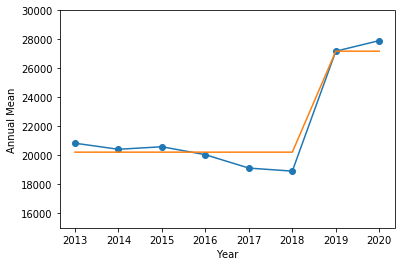

In [654]:
dMean = dfhts['total'].groupby(Temp['Date'].dt.year).mean()
meanLevel = [None]*8
for i in range(0,6):
    meanLevel[i] = np.mean(dMean[0:5])
for i in range(6,8):
    meanLevel[i] = np.mean(dMean[6:7])

# dMean = dMean/(dMean)
year = np.arange(2013,2021)
plt.plot(year,dMean,marker = 'o')
plt.plot(year,Levels)
plt.ylim(15000,30000)
plt.xlabel('Year')
plt.ylabel('Annual Mean')

plt.show()

In [657]:
dfhtsNorm = pd.DataFrame()
k = 0
for i in range(2013,2021):
    if len(dfhtsNorm)!=0:        
        dTemp = dfhts[dfhts.index.year==i]/meanLevel[k]
        dfhtsNorm = pd.concat([dfhtsNorm,dTemp])
    else:
        dfhtsNorm = dfhts[dfhts.index.year==i]/meanLevel[k]
    k+=1

dfhtsNorm

,total,6.0,3.0,8.0,7.0,0.0,4.0,5.0,1.0,2.0,...,2502.04,102.0,2707.02,2403.0,2707.01,2303.0,1308.04,2715.03,2703.02,2720.05
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-14,1.077915,0.115836,0.131478,0.112321,0.126033,0.145933,0.097817,0.129944,0.101084,0.117469,...,0.005099,0.003366,0.003416,0.001040,0.001634,0.003168,0.002723,0.001832,0.001139,0.001485
2013-07-21,1.076975,0.118806,0.133261,0.108608,0.122617,0.141725,0.097173,0.137617,0.100985,0.116182,...,0.005445,0.002376,0.003515,0.000792,0.001980,0.002228,0.002921,0.002376,0.000594,0.000792
2013-07-28,1.113359,0.117618,0.143062,0.124449,0.125241,0.143260,0.097470,0.144844,0.103658,0.113757,...,0.006089,0.003762,0.004307,0.001089,0.001040,0.002574,0.003366,0.002327,0.000693,0.000545
2013-08-04,1.073113,0.120439,0.129845,0.116133,0.129647,0.143706,0.092867,0.138013,0.096480,0.105985,...,0.005396,0.002970,0.004455,0.000941,0.001832,0.002525,0.002178,0.001832,0.000693,0.000545
2013-08-11,1.121527,0.129647,0.131825,0.118063,0.126825,0.147963,0.099945,0.145191,0.105044,0.117024,...,0.005297,0.003416,0.005594,0.001782,0.002030,0.002525,0.003861,0.001782,0.000842,0.000743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26,0.933825,0.088655,0.127208,0.114516,0.106754,0.082107,0.095718,0.115399,0.098367,0.105099,...,0.003200,0.000552,0.003421,0.001324,0.001067,0.001214,0.001177,0.000589,0.001177,0.000956
2020-05-03,0.971568,0.089869,0.127097,0.125479,0.106975,0.092959,0.095755,0.128385,0.096896,0.108152,...,0.004230,0.001067,0.002943,0.001361,0.001067,0.001471,0.001140,0.000552,0.001104,0.001104
2020-05-10,1.005265,0.104805,0.158513,0.126766,0.104327,0.090237,0.096013,0.133020,0.088251,0.103333,...,0.004304,0.001067,0.002428,0.001692,0.001251,0.000956,0.001177,0.000368,0.001324,0.000809


In [658]:
ND_tract = pd.read_csv('Tract_ND.csv')
New_districts = dfWeek.New_district.unique().astype(str)
Census_Tracts = dfWeek.Census_Tracts.unique().astype(str)

# Here we build the tree as a dictionary. Each node (key in dict) has a list of 
# children value in dict, which in turn may also be a key in the dict, and have 
# children as well 
total = {'total': list(New_districts)}
district_h = {k: list(ND_tract[ND_tract['New_district'].astype(str)==k]
                       ['census_tracts'].unique().astype(str)) 
              for k in New_districts}

In [659]:
import json

hierarchy = {**total, **district_h}

with open('hierarchy.json', 'w') as j:
    json.dump(hierarchy, j)

In [660]:
from hts.hierarchy import HierarchyTree
ht = HierarchyTree.from_nodes(nodes=hierarchy, df=dfhts)

In [661]:
# print(ht.children[1].key)

# print(ht.children[1])

In [721]:
# # observe the recursive structure
# ht.children[0].children[2].item
dfUse = dfhtsNorm #dfhts[dfhts.index < '2019-01-01']

from hts import HTSRegressor
clf = HTSRegressor(model='prophet', yearly_seasonality = True, daily_seasonality = False,
                   revision_method='OLS', n_jobs=0)

In [722]:
dfUse = dfhtsNorm[dfhtsNorm.index < '2019-05-01']
# model = clf.fit(dfUse, hierarchy)
# dfUse

,total,6.0,3.0,8.0,7.0,0.0,4.0,5.0,1.0,2.0,...,2502.04,102.0,2707.02,2403.0,2707.01,2303.0,1308.04,2715.03,2703.02,2720.05
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-14,1.077915,0.115836,0.131478,0.112321,0.126033,0.145933,0.097817,0.129944,0.101084,0.117469,...,0.005099,0.003366,0.003416,0.001040,0.001634,0.003168,0.002723,0.001832,0.001139,0.001485
2013-07-21,1.076975,0.118806,0.133261,0.108608,0.122617,0.141725,0.097173,0.137617,0.100985,0.116182,...,0.005445,0.002376,0.003515,0.000792,0.001980,0.002228,0.002921,0.002376,0.000594,0.000792
2013-07-28,1.113359,0.117618,0.143062,0.124449,0.125241,0.143260,0.097470,0.144844,0.103658,0.113757,...,0.006089,0.003762,0.004307,0.001089,0.001040,0.002574,0.003366,0.002327,0.000693,0.000545
2013-08-04,1.073113,0.120439,0.129845,0.116133,0.129647,0.143706,0.092867,0.138013,0.096480,0.105985,...,0.005396,0.002970,0.004455,0.000941,0.001832,0.002525,0.002178,0.001832,0.000693,0.000545
2013-08-11,1.121527,0.129647,0.131825,0.118063,0.126825,0.147963,0.099945,0.145191,0.105044,0.117024,...,0.005297,0.003416,0.005594,0.001782,0.002030,0.002525,0.003861,0.001782,0.000842,0.000743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,1.067802,0.114149,0.130519,0.165098,0.121395,0.113707,0.100721,0.129121,0.089649,0.103444,...,0.004893,0.001950,0.003053,0.002170,0.001839,0.001251,0.001471,0.000993,0.000552,0.000221
2019-04-07,1.185040,0.132137,0.158182,0.163516,0.133351,0.141003,0.116098,0.136478,0.096233,0.108042,...,0.003715,0.001766,0.003826,0.001803,0.001177,0.000552,0.001508,0.001508,0.000441,0.000736
2019-04-14,1.115845,0.114112,0.146962,0.159065,0.130298,0.117901,0.111941,0.136294,0.090532,0.108741,...,0.002612,0.001251,0.002759,0.002318,0.001067,0.000956,0.001177,0.001140,0.000331,0.000773


In [708]:
# future = model.make_future_dataframe(periods=4, freq='W')
# fcst = model.predict(future)
# fig = m.plot(fcst)
preds = model.predict(steps_ahead=8)




Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:01<05:37,  1.62s/it]


Fitting models:   1%|▋                                                                 | 2/210 [00:03<05:36,  1.62s/it]


Fitting models:   1%|▉                                                                 | 3/210 [00:04<05:33,  1.61s/it]


Fitting models:   2%|█▎                                                                | 4/210 [00:06<05:32,  1.61s/it]


Fitting models:   2%|█▌                                                                | 5/210 [00:08<05:41,  1.67s/it]


Fitting models:   3%|█▉                                                                | 6/210 [00:09<05:37,  1.66s/it]


Fitting models:   3%|██▏                                                               | 7/210 [00:11<05:33,  1.64s/it]


Fitting models:   4%|

Fitting models:  30%|███████████████████▏                                             | 62/210 [01:41<04:01,  1.63s/it]


Fitting models:  30%|███████████████████▌                                             | 63/210 [01:43<03:59,  1.63s/it]


Fitting models:  30%|███████████████████▊                                             | 64/210 [01:44<03:56,  1.62s/it]


Fitting models:  31%|████████████████████                                             | 65/210 [01:46<04:02,  1.67s/it]


Fitting models:  31%|████████████████████▍                                            | 66/210 [01:48<03:57,  1.65s/it]


Fitting models:  32%|████████████████████▋                                            | 67/210 [01:49<03:53,  1.63s/it]


Fitting models:  32%|█████████████████████                                            | 68/210 [01:51<03:50,  1.63s/it]


Fitting models:  33%|█████████████████████▎                                           | 69/210 [01:52<03:48,  1.62s/it]


Fitting models:  33%|███

Fitting models:  59%|█████████████████████████████████████▊                          | 124/210 [03:22<02:19,  1.62s/it]


Fitting models:  60%|██████████████████████████████████████                          | 125/210 [03:24<02:17,  1.61s/it]


Fitting models:  60%|██████████████████████████████████████▍                         | 126/210 [03:26<02:20,  1.67s/it]


Fitting models:  60%|██████████████████████████████████████▋                         | 127/210 [03:27<02:16,  1.65s/it]


Fitting models:  61%|███████████████████████████████████████                         | 128/210 [03:29<02:14,  1.64s/it]


Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:31<02:11,  1.63s/it]


Fitting models:  62%|███████████████████████████████████████▌                        | 130/210 [03:32<02:09,  1.62s/it]


Fitting models:  62%|███████████████████████████████████████▉                        | 131/210 [03:34<02:07,  1.62s/it]


Fitting models:  63%|███

Fitting models:  89%|████████████████████████████████████████████████████████▋       | 186/210 [05:05<00:39,  1.66s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▉       | 187/210 [05:07<00:38,  1.65s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▎      | 188/210 [05:09<00:37,  1.70s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▌      | 189/210 [05:10<00:35,  1.68s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▉      | 190/210 [05:12<00:33,  1.67s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:14<00:31,  1.65s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▌     | 192/210 [05:15<00:29,  1.64s/it]


Fitting models:  92%|██████████████████████████████████████████████████████████▊     | 193/210 [05:17<00:27,  1.63s/it]


Fitting models:  92%|███

In [709]:
preds
preds_unNorm = pd.DataFrame()
k = 0
for i in range(2013,2021):
    if len(preds_unNorm)!=0:        
        dTemp = preds[preds.index.year==i]*meanLevel[k]
        preds_unNorm = pd.concat([preds_unNorm,dTemp])
    else:
        preds_unNorm = preds[preds.index.year==i]*meanLevel[k] 
    k+=1

preds_unNorm

,total,6.0,3.0,8.0,7.0,0.0,4.0,5.0,1.0,2.0,...,907.0,908.0,1201.0,1203.0,1205.0,1206.0,1207.0,2710.01,901.0,805.0
2013-07-14,21880.322274,2435.650024,2774.691418,2271.028347,2547.929217,2865.623541,1928.852477,2740.720230,1963.243437,2352.583582,...,101.653926,220.772298,35.678796,119.996175,189.142836,229.433508,104.774126,85.138348,99.675504,31.817509
2013-07-21,21749.234767,2412.654849,2764.794913,2258.760852,2556.500904,2849.648299,1906.457807,2713.027255,1932.197297,2355.192591,...,100.391147,228.869776,36.396911,122.857224,189.203951,231.936590,111.564941,81.975460,99.015475,30.549050
2013-07-28,21709.318398,2406.874018,2770.464098,2263.611570,2537.054574,2852.474651,1901.798453,2743.126374,1914.555773,2319.358886,...,94.657002,226.003289,37.025752,122.670211,187.827205,227.034212,113.420714,78.845187,97.856347,26.591690
2013-08-04,21769.754951,2414.048366,2782.924924,2276.011472,2513.462997,2876.943811,1920.067322,2800.654245,1905.771077,2279.870738,...,90.167367,217.814024,37.390358,119.367311,184.940490,218.259374,109.335423,79.417603,98.401307,24.112868
2013-08-11,21882.987065,2423.235684,2781.388222,2282.314048,2511.292843,2914.716602,1950.607479,2831.264102,1906.713251,2281.454834,...,91.131870,213.101748,37.980149,116.928715,181.539167,212.638191,104.099284,84.572508,101.639255,26.260698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-26,28711.769286,2893.842714,3547.883242,3712.910047,3300.543331,3256.937930,2793.577444,3664.930943,2542.337215,2998.806418,...,144.674328,348.270964,45.737858,176.376398,125.707530,269.452525,151.931790,125.902661,118.385708,190.911389
2019-06-02,28693.795122,2887.128397,3542.545055,3711.226037,3299.477514,3260.234556,2791.280640,3658.013833,2544.323361,2999.565730,...,143.927992,346.881317,45.519418,177.404118,126.857484,268.882969,152.746340,125.402004,118.324000,190.825964
2019-06-09,28680.901261,2880.796325,3538.151403,3709.103213,3299.373528,3263.431728,2789.591717,3652.020097,2547.493631,3000.939618,...,143.014070,345.592118,45.315702,178.431336,127.923321,268.574381,153.541549,124.855504,118.317077,190.819192
2019-06-16,28673.485506,2874.954512,3534.882614,3706.553708,3300.233313,3266.442317,2788.581207,3647.070671,2551.847042,3002.920121,...,141.959670,344.425145,45.133570,179.436916,128.885686,268.529230,154.302549,124.278561,118.373562,190.890465


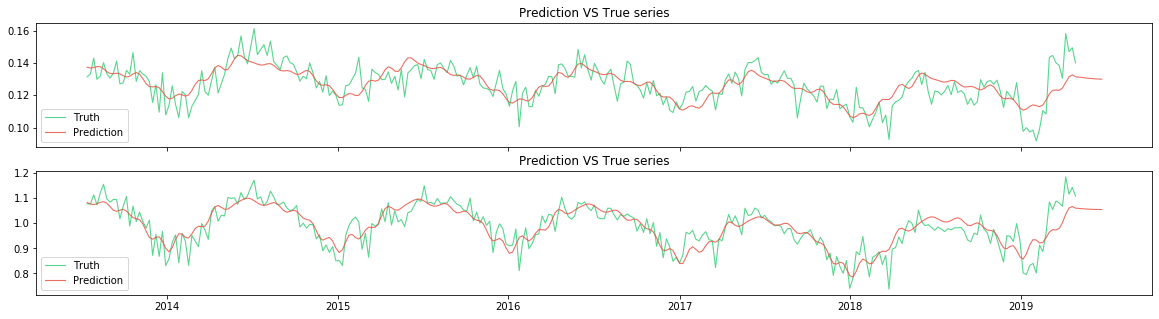

In [767]:
PLOT = [
        '3.0', 
#         '1509.0',
#         '6.0', 
        'total',
       ]

fig, axs = plt.subplots(len(PLOT), figsize=(20, 5), sharex=True)
ax.grid(alpha=0.75)

dts = preds.index

for i, group in enumerate(PLOT):
    axs[i].plot(dfUse[group], 
            lw=1.1, 
            color='#2ecc71', 
            alpha=0.8, 
            label='Truth')
    axs[i].plot(preds[group], 
            lw=1.1,
            color='#e74c3c', 
            alpha=0.8, 
            label='Prediction')
    axs[i].legend()
    axs[i].set_title('Prediction VS True series')

In [752]:
def MAPE_func(pred, actual):
    pred = pred.reset_index(drop=True)
    actual = actual.reset_index(drop=True)
    return ((abs(pred-actual)/actual)*100).mean().mean()

p = preds_unNorm[datesCV[0]:datesCV[200]]
a = dfhts[datesCV[0]:datesCV[200]]
MAPE_func(p,a)

16.30765823337923

In [759]:
datesCV = dfhtsNorm[dfhtsNorm.index < '2018-12-31'].index

nsteps = 8
errorX = []
j = 0
for i in range(228,228+3*nsteps,nsteps): #len(datesCV)-nsteps
    train = dfUse[datesCV[0]:datesCV[i]]
    model = clf.fit(train, hierarchy) 
    
    pred = model.predict(steps_ahead=nsteps)[datesCV[i+1]:datesCV[i+nsteps]]   
    actual = dfUse[datesCV[i+1]:datesCV[i+nsteps]]
    
    MAPE = MAPE_func(pred,actual)
    errorX.append(MAPE)
    print('step ' + str(j) + ' error = ' + str(MAPE) + '%')    
    j+=1




Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:32,  6.39it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:32,  6.44it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:31,  6.66it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:00<00:28,  7.31it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:00<00:28,  7.19it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:00<00:27,  7.43it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:30,  6.72it/s]


Fitting models:   4%|

Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:09<00:14,  9.02it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:09<00:14,  9.09it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:10<00:16,  8.09it/s]


Fitting models:  38%|████████████████████████▍                                        | 79/210 [00:10<00:16,  8.08it/s]


Fitting models:  38%|████████████████████████▊                                        | 80/210 [00:10<00:20,  6.30it/s]


Fitting models:  39%|█████████████████████████▍                                       | 82/210 [00:10<00:17,  7.47it/s]


Fitting models:  40%|██████████████████████████                                       | 84/210 [00:10<00:16,  7.87it/s]


Fitting models:  41%|██████████████████████████▌                                      | 86/210 [00:11<00:14,  8.40it/s]


Fitting models:  42%|███

Fitting models:  75%|████████████████████████████████████████████████▏               | 158/210 [00:19<00:05,  8.78it/s]


Fitting models:  76%|████████████████████████████████████████████████▍               | 159/210 [00:19<00:05,  9.11it/s]


Fitting models:  76%|████████████████████████████████████████████████▊               | 160/210 [00:19<00:06,  7.56it/s]


Fitting models:  77%|█████████████████████████████████████████████████               | 161/210 [00:20<00:06,  7.58it/s]


Fitting models:  77%|█████████████████████████████████████████████████▎              | 162/210 [00:20<00:05,  8.03it/s]


Fitting models:  78%|█████████████████████████████████████████████████▋              | 163/210 [00:20<00:05,  8.25it/s]


Fitting models:  78%|█████████████████████████████████████████████████▉              | 164/210 [00:20<00:05,  8.12it/s]


Fitting models:  79%|██████████████████████████████████████████████████▎             | 165/210 [00:20<00:05,  7.94it/s]


Fitting models:  80%|███

Fitting models:  10%|██████▌                                                          | 21/210 [00:34<05:12,  1.66s/it]


Fitting models:  10%|██████▊                                                          | 22/210 [00:36<05:08,  1.64s/it]


Fitting models:  11%|███████                                                          | 23/210 [00:37<05:03,  1.62s/it]


Fitting models:  11%|███████▍                                                         | 24/210 [00:39<05:00,  1.61s/it]


Fitting models:  12%|███████▋                                                         | 25/210 [00:40<04:56,  1.61s/it]


Fitting models:  12%|████████                                                         | 26/210 [00:42<04:53,  1.59s/it]


Fitting models:  13%|████████▎                                                        | 27/210 [00:43<04:51,  1.59s/it]


Fitting models:  13%|████████▋                                                        | 28/210 [00:45<04:59,  1.65s/it]


Fitting models:  14%|███

Fitting models:  40%|█████████████████████████▋                                       | 83/210 [02:15<03:25,  1.61s/it]


Fitting models:  40%|██████████████████████████                                       | 84/210 [02:16<03:21,  1.60s/it]


Fitting models:  40%|██████████████████████████▎                                      | 85/210 [02:18<03:19,  1.60s/it]


Fitting models:  41%|██████████████████████████▌                                      | 86/210 [02:19<03:17,  1.59s/it]


Fitting models:  41%|██████████████████████████▉                                      | 87/210 [02:21<03:17,  1.60s/it]


Fitting models:  42%|███████████████████████████▏                                     | 88/210 [02:23<03:31,  1.74s/it]


Fitting models:  42%|███████████████████████████▌                                     | 89/210 [02:25<03:23,  1.68s/it]


Fitting models:  43%|███████████████████████████▊                                     | 90/210 [02:26<03:18,  1.65s/it]


Fitting models:  43%|███

Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [03:56<01:47,  1.66s/it]


Fitting models:  70%|████████████████████████████████████████████▍                   | 146/210 [03:58<01:45,  1.65s/it]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [03:59<01:42,  1.63s/it]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [04:01<01:42,  1.65s/it]


Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [04:03<01:39,  1.63s/it]


Fitting models:  71%|█████████████████████████████████████████████▋                  | 150/210 [04:04<01:40,  1.67s/it]


Fitting models:  72%|██████████████████████████████████████████████                  | 151/210 [04:06<01:37,  1.66s/it]


Fitting models:  72%|██████████████████████████████████████████████▎                 | 152/210 [04:08<01:35,  1.65s/it]


Fitting models:  73%|███

Fitting models:  99%|███████████████████████████████████████████████████████████████ | 207/210 [05:38<00:04,  1.63s/it]


Fitting models:  99%|███████████████████████████████████████████████████████████████▍| 208/210 [05:40<00:03,  1.62s/it]


Fitting models: 100%|███████████████████████████████████████████████████████████████▋| 209/210 [05:41<00:01,  1.61s/it]


Fitting models: 100%|████████████████████████████████████████████████████████████████| 210/210 [05:43<00:00,  1.64s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x0000017314FC3448>


step 0 error = 20.175775957611556%





Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:37,  5.60it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:42,  4.95it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:37,  5.47it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:00<00:34,  6.00it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:00<00:39,  5.20it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:40,  5.04it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:35,  5.73it/s]


Fitting models:   4%|

Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:09<00:14,  9.14it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:09<00:14,  9.30it/s]


Fitting models:  38%|████████████████████████▍                                        | 79/210 [00:09<00:15,  8.66it/s]


Fitting models:  38%|████████████████████████▊                                        | 80/210 [00:09<00:17,  7.27it/s]


Fitting models:  39%|█████████████████████████                                        | 81/210 [00:10<00:16,  7.72it/s]


Fitting models:  40%|█████████████████████████▋                                       | 83/210 [00:10<00:14,  8.54it/s]


Fitting models:  40%|██████████████████████████                                       | 84/210 [00:10<00:14,  8.86it/s]


Fitting models:  40%|██████████████████████████▎                                      | 85/210 [00:10<00:15,  8.19it/s]


Fitting models:  41%|███

Fitting models:  73%|██████████████████████████████████████████████▉                 | 154/210 [00:19<00:08,  6.78it/s]


Fitting models:  74%|███████████████████████████████████████████████▌                | 156/210 [00:19<00:07,  7.58it/s]


Fitting models:  75%|███████████████████████████████████████████████▊                | 157/210 [00:19<00:07,  7.18it/s]


Fitting models:  75%|████████████████████████████████████████████████▏               | 158/210 [00:19<00:07,  7.01it/s]


Fitting models:  76%|████████████████████████████████████████████████▊               | 160/210 [00:20<00:06,  7.80it/s]


Fitting models:  77%|█████████████████████████████████████████████████               | 161/210 [00:20<00:06,  7.43it/s]


Fitting models:  77%|█████████████████████████████████████████████████▎              | 162/210 [00:20<00:06,  7.58it/s]


Fitting models:  78%|█████████████████████████████████████████████████▋              | 163/210 [00:20<00:06,  6.88it/s]


Fitting models:  79%|███

Fitting models:   9%|█████▌                                                           | 18/210 [00:29<05:11,  1.62s/it]


Fitting models:   9%|█████▉                                                           | 19/210 [00:30<05:07,  1.61s/it]


Fitting models:  10%|██████▏                                                          | 20/210 [00:32<05:14,  1.66s/it]


Fitting models:  10%|██████▌                                                          | 21/210 [00:34<05:07,  1.63s/it]


Fitting models:  10%|██████▊                                                          | 22/210 [00:35<05:02,  1.61s/it]


Fitting models:  11%|███████                                                          | 23/210 [00:37<04:59,  1.60s/it]


Fitting models:  11%|███████▍                                                         | 24/210 [00:39<04:56,  1.59s/it]


Fitting models:  12%|███████▋                                                         | 25/210 [00:40<04:55,  1.59s/it]


Fitting models:  12%|███

Fitting models:  38%|████████████████████████▊                                        | 80/210 [02:09<03:34,  1.65s/it]


Fitting models:  39%|█████████████████████████                                        | 81/210 [02:11<03:31,  1.64s/it]


Fitting models:  39%|█████████████████████████▍                                       | 82/210 [02:12<03:27,  1.62s/it]


Fitting models:  40%|█████████████████████████▋                                       | 83/210 [02:14<03:24,  1.61s/it]


Fitting models:  40%|██████████████████████████                                       | 84/210 [02:16<03:23,  1.61s/it]


Fitting models:  40%|██████████████████████████▎                                      | 85/210 [02:17<03:20,  1.61s/it]


Fitting models:  41%|██████████████████████████▌                                      | 86/210 [02:19<03:18,  1.60s/it]


Fitting models:  41%|██████████████████████████▉                                      | 87/210 [02:20<03:22,  1.65s/it]


Fitting models:  42%|███

Fitting models:  68%|███████████████████████████████████████████▎                    | 142/210 [03:52<02:10,  1.92s/it]


Fitting models:  68%|███████████████████████████████████████████▌                    | 143/210 [03:54<02:07,  1.90s/it]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [03:56<02:01,  1.85s/it]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [03:57<01:58,  1.82s/it]


Fitting models:  70%|████████████████████████████████████████████▍                   | 146/210 [03:59<01:55,  1.80s/it]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [04:01<01:50,  1.76s/it]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [04:03<01:50,  1.78s/it]


Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [04:05<01:53,  1.86s/it]


Fitting models:  71%|███

Fitting models:  97%|██████████████████████████████████████████████████████████████▏ | 204/210 [05:33<00:09,  1.60s/it]


Fitting models:  98%|██████████████████████████████████████████████████████████████▍ | 205/210 [05:35<00:08,  1.66s/it]


Fitting models:  98%|██████████████████████████████████████████████████████████████▊ | 206/210 [05:37<00:06,  1.64s/it]


Fitting models:  99%|███████████████████████████████████████████████████████████████ | 207/210 [05:38<00:04,  1.61s/it]


Fitting models:  99%|███████████████████████████████████████████████████████████████▍| 208/210 [05:40<00:03,  1.60s/it]


Fitting models: 100%|███████████████████████████████████████████████████████████████▋| 209/210 [05:41<00:01,  1.59s/it]


Fitting models: 100%|████████████████████████████████████████████████████████████████| 210/210 [05:43<00:00,  1.64s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x00000173033E1148>



Fitting models:   0%|             

step 1 error = 20.039552920960173%





Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:33,  6.24it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:30,  6.86it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:00<00:27,  7.47it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:00<00:26,  7.82it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:00<00:28,  7.08it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:29,  6.82it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:27,  7.29it/s]


Fitting models:   4%|██▊                                                               | 9/210 [00:01<00:35,  5.58it/s]


Fitting models:   5%|

Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:10<00:18,  7.20it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:10<00:19,  6.99it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:10<00:18,  7.21it/s]


Fitting models:  38%|████████████████████████▍                                        | 79/210 [00:10<00:18,  7.15it/s]


Fitting models:  38%|████████████████████████▊                                        | 80/210 [00:10<00:19,  6.75it/s]


Fitting models:  39%|█████████████████████████                                        | 81/210 [00:10<00:19,  6.65it/s]


Fitting models:  39%|█████████████████████████▍                                       | 82/210 [00:10<00:18,  6.92it/s]


Fitting models:  40%|█████████████████████████▋                                       | 83/210 [00:11<00:16,  7.57it/s]


Fitting models:  40%|███

Fitting models:  72%|██████████████████████████████████████████████▎                 | 152/210 [00:19<00:08,  6.84it/s]


Fitting models:  73%|██████████████████████████████████████████████▋                 | 153/210 [00:20<00:08,  6.46it/s]


Fitting models:  73%|██████████████████████████████████████████████▉                 | 154/210 [00:20<00:08,  6.95it/s]


Fitting models:  74%|███████████████████████████████████████████████▏                | 155/210 [00:20<00:08,  6.71it/s]


Fitting models:  74%|███████████████████████████████████████████████▌                | 156/210 [00:20<00:08,  6.53it/s]


Fitting models:  75%|███████████████████████████████████████████████▊                | 157/210 [00:20<00:07,  7.01it/s]


Fitting models:  75%|████████████████████████████████████████████████▏               | 158/210 [00:20<00:06,  7.64it/s]


Fitting models:  76%|████████████████████████████████████████████████▍               | 159/210 [00:20<00:06,  7.48it/s]


Fitting models:  76%|███

Fitting models:   8%|█████▎                                                           | 17/210 [00:27<05:09,  1.61s/it]


Fitting models:   9%|█████▌                                                           | 18/210 [00:29<05:09,  1.61s/it]


Fitting models:   9%|█████▉                                                           | 19/210 [00:30<05:05,  1.60s/it]


Fitting models:  10%|██████▏                                                          | 20/210 [00:32<05:12,  1.64s/it]


Fitting models:  10%|██████▌                                                          | 21/210 [00:34<05:09,  1.64s/it]


Fitting models:  10%|██████▊                                                          | 22/210 [00:35<05:05,  1.63s/it]


Fitting models:  11%|███████                                                          | 23/210 [00:37<05:05,  1.63s/it]


Fitting models:  11%|███████▍                                                         | 24/210 [00:39<05:01,  1.62s/it]


Fitting models:  12%|███

Fitting models:  38%|████████████████████████▍                                        | 79/210 [02:08<03:29,  1.60s/it]


Fitting models:  38%|████████████████████████▊                                        | 80/210 [02:10<03:35,  1.66s/it]


Fitting models:  39%|█████████████████████████                                        | 81/210 [02:11<03:32,  1.65s/it]


Fitting models:  39%|█████████████████████████▍                                       | 82/210 [02:13<03:28,  1.63s/it]


Fitting models:  40%|█████████████████████████▋                                       | 83/210 [02:14<03:25,  1.62s/it]


Fitting models:  40%|██████████████████████████                                       | 84/210 [02:16<03:22,  1.61s/it]


Fitting models:  40%|██████████████████████████▎                                      | 85/210 [02:18<03:21,  1.61s/it]


Fitting models:  41%|██████████████████████████▌                                      | 86/210 [02:19<03:19,  1.61s/it]


Fitting models:  41%|███

Fitting models:  67%|██████████████████████████████████████████▉                     | 141/210 [03:49<01:49,  1.59s/it]


Fitting models:  68%|███████████████████████████████████████████▎                    | 142/210 [03:50<01:51,  1.64s/it]


Fitting models:  68%|███████████████████████████████████████████▌                    | 143/210 [03:52<01:48,  1.62s/it]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [03:54<01:45,  1.60s/it]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [03:55<01:44,  1.60s/it]


Fitting models:  70%|████████████████████████████████████████████▍                   | 146/210 [03:57<01:41,  1.59s/it]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [03:58<01:39,  1.58s/it]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [04:00<01:38,  1.59s/it]


Fitting models:  71%|███

Fitting models:  97%|█████████████████████████████████████████████████████████████▊  | 203/210 [05:30<00:11,  1.60s/it]


Fitting models:  97%|██████████████████████████████████████████████████████████████▏ | 204/210 [05:31<00:09,  1.60s/it]


Fitting models:  98%|██████████████████████████████████████████████████████████████▍ | 205/210 [05:33<00:08,  1.66s/it]


Fitting models:  98%|██████████████████████████████████████████████████████████████▊ | 206/210 [05:35<00:06,  1.64s/it]


Fitting models:  99%|███████████████████████████████████████████████████████████████ | 207/210 [05:36<00:04,  1.64s/it]


Fitting models:  99%|███████████████████████████████████████████████████████████████▍| 208/210 [05:38<00:03,  1.65s/it]


Fitting models: 100%|███████████████████████████████████████████████████████████████▋| 209/210 [05:39<00:01,  1.62s/it]


Fitting models: 100%|████████████████████████████████████████████████████████████████| 210/210 [05:41<00:00,  1.63s/it]
INFO:hts.core.regressor:Re

step 2 error = 20.79306796158021%


In [760]:
errorX

[20.175775957611556, 20.039552920960173, 20.79306796158021]

In [754]:
datesCV = dfhtsNorm[dfhtsNorm.index < '2018-12-31'].index
nsteps = 8
j = 0
error0 = []
for i in range(228,len(datesCV)-nsteps,nsteps):
    pred = dfhtsNorm[datesCV[i+1-nsteps]:datesCV[i]]  
    actual = dfhtsNorm[datesCV[i+1]:datesCV[i+nsteps]]
    MAPE0 = MAPE_func(pred,actual)
    error0.append(MAPE0)
    print('step ' + str(j) + ' error = ' + str(MAPE0) + '%')    
    j+=1
    
np.mean(error0)

step 0 error = 26.623269355535463%
step 1 error = 23.518972223688237%
step 2 error = 24.07460594687454%
step 3 error = 21.888073897539325%
step 4 error = 21.850894904499945%
step 5 error = 21.534965148025424%
step 6 error = 23.24709332437995%


23.248267828648984

In [740]:
datesCV = dfhtsNorm.index

nsteps = 8
error2 = []
j = 0
for i in range(288,len(datesCV)-nsteps,nsteps): 
    train2 = dfUse[datesCV[0]:datesCV[i]]
    model = clf.fit(train2, hierarchy) 
    
    pred2 = model.predict(steps_ahead=nsteps)[datesCV[i+1]:datesCV[i+nsteps]]   
    actual = dfUse[datesCV[i+1]:datesCV[i+nsteps]]
    
    MAPE2 = MAPE_func(pred2,actual)
    error2.append(MAPE2)
    print('step ' + str(j) + ' error = ' + str(MAPE) + '%')    
    j+=1
    
error2




Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:43,  4.76it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:38,  5.38it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:36,  5.61it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:00<00:39,  5.23it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:00<00:38,  5.35it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:36,  5.66it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:34,  5.97it/s]


Fitting models:   4%|

Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:09<00:16,  8.35it/s]


Fitting models:  35%|██████████████████████▉                                          | 74/210 [00:09<00:16,  8.35it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:10<00:16,  8.13it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:10<00:18,  7.13it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:10<00:19,  6.62it/s]


Fitting models:  38%|████████████████████████▍                                        | 79/210 [00:10<00:19,  6.86it/s]


Fitting models:  38%|████████████████████████▊                                        | 80/210 [00:10<00:19,  6.53it/s]


Fitting models:  39%|█████████████████████████                                        | 81/210 [00:10<00:20,  6.44it/s]


Fitting models:  39%|███

Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [00:19<00:06,  8.96it/s]


Fitting models:  71%|█████████████████████████████████████████████▋                  | 150/210 [00:19<00:07,  8.57it/s]


Fitting models:  72%|██████████████████████████████████████████████                  | 151/210 [00:19<00:06,  8.91it/s]


Fitting models:  73%|██████████████████████████████████████████████▋                 | 153/210 [00:19<00:06,  8.97it/s]


Fitting models:  73%|██████████████████████████████████████████████▉                 | 154/210 [00:20<00:07,  7.70it/s]


Fitting models:  74%|███████████████████████████████████████████████▏                | 155/210 [00:20<00:07,  7.57it/s]


Fitting models:  74%|███████████████████████████████████████████████▌                | 156/210 [00:20<00:07,  7.09it/s]


Fitting models:  75%|███████████████████████████████████████████████▊                | 157/210 [00:20<00:07,  7.28it/s]


Fitting models:  75%|███

Fitting models:   2%|█▌                                                                | 5/210 [00:07<05:23,  1.58s/it]


Fitting models:   3%|█▉                                                                | 6/210 [00:09<05:20,  1.57s/it]


Fitting models:   3%|██▏                                                               | 7/210 [00:11<05:19,  1.57s/it]


Fitting models:   4%|██▌                                                               | 8/210 [00:12<05:27,  1.62s/it]


Fitting models:   4%|██▊                                                               | 9/210 [00:14<05:21,  1.60s/it]


Fitting models:   5%|███                                                              | 10/210 [00:15<05:17,  1.59s/it]


Fitting models:   5%|███▍                                                             | 11/210 [00:17<05:15,  1.58s/it]


Fitting models:   6%|███▋                                                             | 12/210 [00:19<05:12,  1.58s/it]


Fitting models:   6%|███

Fitting models:  32%|████████████████████▋                                            | 67/210 [01:46<03:45,  1.58s/it]


Fitting models:  32%|█████████████████████                                            | 68/210 [01:48<03:42,  1.57s/it]


Fitting models:  33%|█████████████████████▎                                           | 69/210 [01:49<03:40,  1.57s/it]


Fitting models:  33%|█████████████████████▋                                           | 70/210 [01:51<03:38,  1.56s/it]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [01:53<03:44,  1.61s/it]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [01:54<03:40,  1.60s/it]


Fitting models:  35%|██████████████████████▌                                          | 73/210 [01:56<03:38,  1.60s/it]


Fitting models:  35%|██████████████████████▉                                          | 74/210 [01:57<03:35,  1.58s/it]


Fitting models:  36%|███

Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:25<02:08,  1.58s/it]


Fitting models:  62%|███████████████████████████████████████▌                        | 130/210 [03:26<02:06,  1.58s/it]


Fitting models:  62%|███████████████████████████████████████▉                        | 131/210 [03:28<02:04,  1.58s/it]


Fitting models:  63%|████████████████████████████████████████▏                       | 132/210 [03:29<02:02,  1.57s/it]


Fitting models:  63%|████████████████████████████████████████▌                       | 133/210 [03:31<02:01,  1.57s/it]


Fitting models:  64%|████████████████████████████████████████▊                       | 134/210 [03:33<02:03,  1.62s/it]


Fitting models:  64%|█████████████████████████████████████████▏                      | 135/210 [03:34<02:00,  1.60s/it]


Fitting models:  65%|█████████████████████████████████████████▍                      | 136/210 [03:36<01:57,  1.59s/it]


Fitting models:  65%|███

Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:03<00:30,  1.60s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▌     | 192/210 [05:05<00:28,  1.59s/it]


Fitting models:  92%|██████████████████████████████████████████████████████████▊     | 193/210 [05:06<00:26,  1.58s/it]


Fitting models:  92%|███████████████████████████████████████████████████████████     | 194/210 [05:08<00:25,  1.58s/it]


Fitting models:  93%|███████████████████████████████████████████████████████████▍    | 195/210 [05:09<00:23,  1.58s/it]


Fitting models:  93%|███████████████████████████████████████████████████████████▋    | 196/210 [05:11<00:22,  1.57s/it]


Fitting models:  94%|████████████████████████████████████████████████████████████    | 197/210 [05:13<00:21,  1.62s/it]


Fitting models:  94%|████████████████████████████████████████████████████████████▎   | 198/210 [05:14<00:19,  1.61s/it]


Fitting models:  95%|███

step 0 error = 5.341390493968249%





Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:56,  3.70it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:47,  4.38it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:39,  5.19it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:00<00:37,  5.56it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:00<00:35,  5.75it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:00<00:35,  5.76it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:33,  6.14it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:33,  6.07it/s]


Fitting models:   4%|

Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:10<00:19,  7.11it/s]


Fitting models:  35%|██████████████████████▉                                          | 74/210 [00:10<00:18,  7.52it/s]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:10<00:19,  7.08it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:10<00:17,  7.58it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:10<00:18,  7.31it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:11<00:17,  7.74it/s]


Fitting models:  38%|████████████████████████▍                                        | 79/210 [00:11<00:16,  7.72it/s]


Fitting models:  38%|████████████████████████▊                                        | 80/210 [00:11<00:21,  5.93it/s]


Fitting models:  39%|███

Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [00:20<00:07,  8.45it/s]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [00:20<00:09,  6.81it/s]


Fitting models:  70%|████████████████████████████████████████████▍                   | 146/210 [00:20<00:08,  7.41it/s]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [00:21<00:07,  7.94it/s]


Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [00:21<00:07,  7.86it/s]


Fitting models:  72%|██████████████████████████████████████████████                  | 151/210 [00:21<00:07,  8.09it/s]


Fitting models:  72%|██████████████████████████████████████████████▎                 | 152/210 [00:21<00:07,  7.78it/s]


Fitting models:  73%|██████████████████████████████████████████████▉                 | 154/210 [00:21<00:07,  7.57it/s]


Fitting models:  74%|███

Fitting models:   3%|██▏                                                               | 7/210 [00:11<05:23,  1.59s/it]


Fitting models:   4%|██▌                                                               | 8/210 [00:12<05:19,  1.58s/it]


Fitting models:   4%|██▊                                                               | 9/210 [00:14<05:16,  1.58s/it]


Fitting models:   5%|███                                                              | 10/210 [00:15<05:13,  1.57s/it]


Fitting models:   5%|███▍                                                             | 11/210 [00:17<05:12,  1.57s/it]


Fitting models:   6%|███▋                                                             | 12/210 [00:19<05:21,  1.62s/it]


Fitting models:   6%|████                                                             | 13/210 [00:20<05:15,  1.60s/it]


Fitting models:   7%|████▎                                                            | 14/210 [00:22<05:10,  1.59s/it]


Fitting models:   7%|███

Fitting models:  33%|█████████████████████▎                                           | 69/210 [01:49<03:43,  1.58s/it]


Fitting models:  33%|█████████████████████▋                                           | 70/210 [01:51<03:41,  1.58s/it]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [01:52<03:40,  1.59s/it]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [01:54<03:45,  1.63s/it]


Fitting models:  35%|██████████████████████▌                                          | 73/210 [01:56<03:41,  1.62s/it]


Fitting models:  35%|██████████████████████▉                                          | 74/210 [01:57<03:37,  1.60s/it]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [01:59<03:34,  1.59s/it]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [02:00<03:31,  1.58s/it]


Fitting models:  37%|███

Fitting models:  62%|███████████████████████████████████████▉                        | 131/210 [03:28<02:04,  1.57s/it]


Fitting models:  63%|████████████████████████████████████████▏                       | 132/210 [03:30<02:06,  1.62s/it]


Fitting models:  63%|████████████████████████████████████████▌                       | 133/210 [03:31<02:03,  1.60s/it]


Fitting models:  64%|████████████████████████████████████████▊                       | 134/210 [03:33<02:00,  1.59s/it]


Fitting models:  64%|█████████████████████████████████████████▏                      | 135/210 [03:34<01:58,  1.58s/it]


Fitting models:  65%|█████████████████████████████████████████▍                      | 136/210 [03:36<01:56,  1.57s/it]


Fitting models:  65%|█████████████████████████████████████████▊                      | 137/210 [03:38<01:54,  1.57s/it]


Fitting models:  66%|██████████████████████████████████████████                      | 138/210 [03:39<01:52,  1.57s/it]


Fitting models:  66%|███

Fitting models:  92%|██████████████████████████████████████████████████████████▊     | 193/210 [05:07<00:27,  1.60s/it]


Fitting models:  92%|███████████████████████████████████████████████████████████     | 194/210 [05:08<00:25,  1.59s/it]


Fitting models:  93%|███████████████████████████████████████████████████████████▍    | 195/210 [05:10<00:23,  1.58s/it]


Fitting models:  93%|███████████████████████████████████████████████████████████▋    | 196/210 [05:12<00:22,  1.57s/it]


Fitting models:  94%|████████████████████████████████████████████████████████████    | 197/210 [05:13<00:20,  1.57s/it]


Fitting models:  94%|████████████████████████████████████████████████████████████▎   | 198/210 [05:15<00:18,  1.57s/it]


Fitting models:  95%|████████████████████████████████████████████████████████████▋   | 199/210 [05:16<00:17,  1.62s/it]


Fitting models:  95%|████████████████████████████████████████████████████████████▉   | 200/210 [05:18<00:16,  1.60s/it]


Fitting models:  96%|███

step 1 error = 5.341390493968249%





Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:41,  5.00it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:47,  4.35it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:48,  4.29it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:01<00:58,  3.53it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:01<00:54,  3.78it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:47,  4.29it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:48,  4.20it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:45,  4.47it/s]


Fitting models:   4%|

Fitting models:  33%|█████████████████████▋                                           | 70/210 [00:11<00:25,  5.49it/s]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [00:11<00:22,  6.12it/s]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:11<00:22,  6.27it/s]


Fitting models:  35%|██████████████████████▌                                          | 73/210 [00:11<00:19,  6.92it/s]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:11<00:17,  7.55it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:11<00:16,  8.11it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:12<00:21,  6.08it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:12<00:20,  6.37it/s]


Fitting models:  38%|███

Fitting models:  67%|██████████████████████████████████████████▉                     | 141/210 [00:21<00:13,  5.10it/s]


Fitting models:  68%|███████████████████████████████████████████▌                    | 143/210 [00:22<00:11,  6.08it/s]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [00:22<00:10,  6.49it/s]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [00:22<00:10,  6.06it/s]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [00:22<00:08,  7.10it/s]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [00:22<00:07,  7.77it/s]


Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [00:22<00:08,  7.09it/s]


Fitting models:  71%|█████████████████████████████████████████████▋                  | 150/210 [00:23<00:08,  6.95it/s]


Fitting models:  72%|███

Fitting models: 100%|████████████████████████████████████████████████████████████████| 210/210 [00:32<00:00,  6.45it/s]



Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:01<06:01,  1.73s/it]


Fitting models:   1%|▋                                                                 | 2/210 [00:03<05:50,  1.68s/it]


Fitting models:   1%|▉                                                                 | 3/210 [00:04<05:40,  1.65s/it]


Fitting models:   2%|█▎                                                                | 4/210 [00:06<05:34,  1.62s/it]


Fitting models:   2%|█▌                                                                | 5/210 [00:08<05:29,  1.61s/it]


Fitting models:   3%|█▉                                                                | 6/210 [00:09<05:25,  1.60s/it]


Fitting models:   3%|██

Fitting models:  29%|██████████████████▉                                              | 61/210 [01:37<04:01,  1.62s/it]


Fitting models:  30%|███████████████████▏                                             | 62/210 [01:38<03:57,  1.60s/it]


Fitting models:  30%|███████████████████▌                                             | 63/210 [01:40<03:54,  1.59s/it]


Fitting models:  30%|███████████████████▊                                             | 64/210 [01:41<03:51,  1.58s/it]


Fitting models:  31%|████████████████████                                             | 65/210 [01:43<03:48,  1.57s/it]


Fitting models:  31%|████████████████████▍                                            | 66/210 [01:45<03:46,  1.57s/it]


Fitting models:  32%|████████████████████▋                                            | 67/210 [01:46<03:44,  1.57s/it]


Fitting models:  32%|█████████████████████                                            | 68/210 [01:48<03:50,  1.62s/it]


Fitting models:  33%|███

Fitting models:  59%|█████████████████████████████████████▍                          | 123/210 [03:15<02:19,  1.60s/it]


Fitting models:  59%|█████████████████████████████████████▊                          | 124/210 [03:17<02:16,  1.59s/it]


Fitting models:  60%|██████████████████████████████████████                          | 125/210 [03:18<02:14,  1.59s/it]


Fitting models:  60%|██████████████████████████████████████▍                         | 126/210 [03:20<02:12,  1.58s/it]


Fitting models:  60%|██████████████████████████████████████▋                         | 127/210 [03:22<02:10,  1.57s/it]


Fitting models:  61%|███████████████████████████████████████                         | 128/210 [03:23<02:08,  1.57s/it]


Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:25<02:10,  1.61s/it]


Fitting models:  62%|███████████████████████████████████████▌                        | 130/210 [03:26<02:07,  1.59s/it]


Fitting models:  62%|███

Fitting models:  88%|████████████████████████████████████████████████████████▍       | 185/210 [04:54<00:40,  1.61s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▋       | 186/210 [04:55<00:38,  1.60s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▉       | 187/210 [04:57<00:36,  1.59s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▎      | 188/210 [04:59<00:34,  1.58s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▌      | 189/210 [05:00<00:33,  1.57s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▉      | 190/210 [05:02<00:31,  1.57s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:03<00:30,  1.62s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▌     | 192/210 [05:05<00:28,  1.60s/it]


Fitting models:  92%|███

step 2 error = 5.341390493968249%





Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:39,  5.27it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:47,  4.42it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:46,  4.41it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:01<00:57,  3.58it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:01<00:53,  3.82it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:47,  4.33it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:48,  4.17it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:45,  4.44it/s]


Fitting models:   4%|

Fitting models:  33%|█████████████████████▎                                           | 69/210 [00:10<00:26,  5.31it/s]


Fitting models:  33%|█████████████████████▋                                           | 70/210 [00:11<00:26,  5.30it/s]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [00:11<00:23,  5.95it/s]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:11<00:22,  6.14it/s]


Fitting models:  35%|██████████████████████▌                                          | 73/210 [00:11<00:19,  6.94it/s]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:11<00:18,  7.47it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:11<00:16,  8.08it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:12<00:22,  5.93it/s]


Fitting models:  37%|███

Fitting models:  66%|██████████████████████████████████████████                      | 138/210 [00:21<00:12,  5.65it/s]


Fitting models:  66%|██████████████████████████████████████████▎                     | 139/210 [00:21<00:13,  5.10it/s]


Fitting models:  67%|██████████████████████████████████████████▋                     | 140/210 [00:21<00:12,  5.67it/s]


Fitting models:  67%|██████████████████████████████████████████▉                     | 141/210 [00:21<00:13,  5.12it/s]


Fitting models:  68%|███████████████████████████████████████████▎                    | 142/210 [00:22<00:11,  6.00it/s]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [00:22<00:09,  6.68it/s]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [00:22<00:10,  6.08it/s]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [00:22<00:08,  7.17it/s]


Fitting models:  71%|███

Fitting models: 100%|███████████████████████████████████████████████████████████████▋| 209/210 [00:32<00:00,  6.26it/s]


Fitting models: 100%|████████████████████████████████████████████████████████████████| 210/210 [00:32<00:00,  6.42it/s]



Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:01<05:28,  1.57s/it]


Fitting models:   1%|▋                                                                 | 2/210 [00:03<05:26,  1.57s/it]


Fitting models:   1%|▉                                                                 | 3/210 [00:04<05:24,  1.57s/it]


Fitting models:   2%|█▎                                                                | 4/210 [00:06<05:22,  1.57s/it]


Fitting models:   2%|█▌                                                                | 5/210 [00:07<05:22,  1.57s/it]


Fitting models:   3%|█▉

Fitting models:  29%|██████████████████▌                                              | 60/210 [01:35<04:03,  1.62s/it]


Fitting models:  29%|██████████████████▉                                              | 61/210 [01:37<03:58,  1.60s/it]


Fitting models:  30%|███████████████████▏                                             | 62/210 [01:38<03:55,  1.59s/it]


Fitting models:  30%|███████████████████▌                                             | 63/210 [01:40<03:54,  1.59s/it]


Fitting models:  30%|███████████████████▊                                             | 64/210 [01:42<03:52,  1.59s/it]


Fitting models:  31%|████████████████████                                             | 65/210 [01:43<03:50,  1.59s/it]


Fitting models:  31%|████████████████████▍                                            | 66/210 [01:45<03:47,  1.58s/it]


Fitting models:  32%|████████████████████▋                                            | 67/210 [01:46<03:52,  1.62s/it]


Fitting models:  32%|███

Fitting models:  58%|█████████████████████████████████████▏                          | 122/210 [03:14<02:21,  1.60s/it]


Fitting models:  59%|█████████████████████████████████████▍                          | 123/210 [03:16<02:18,  1.59s/it]


Fitting models:  59%|█████████████████████████████████████▊                          | 124/210 [03:17<02:16,  1.58s/it]


Fitting models:  60%|██████████████████████████████████████                          | 125/210 [03:19<02:14,  1.58s/it]


Fitting models:  60%|██████████████████████████████████████▍                         | 126/210 [03:20<02:11,  1.57s/it]


Fitting models:  60%|██████████████████████████████████████▋                         | 127/210 [03:22<02:10,  1.57s/it]


Fitting models:  61%|███████████████████████████████████████                         | 128/210 [03:24<02:13,  1.62s/it]


Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:25<02:09,  1.60s/it]


Fitting models:  62%|███

Fitting models:  88%|████████████████████████████████████████████████████████        | 184/210 [04:53<00:41,  1.60s/it]


Fitting models:  88%|████████████████████████████████████████████████████████▍       | 185/210 [04:54<00:39,  1.59s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▋       | 186/210 [04:56<00:38,  1.58s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▉       | 187/210 [04:57<00:36,  1.57s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▎      | 188/210 [04:59<00:34,  1.57s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▌      | 189/210 [05:00<00:33,  1.58s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▉      | 190/210 [05:02<00:32,  1.63s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:04<00:31,  1.66s/it]


Fitting models:  91%|███

step 3 error = 5.341390493968249%





Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:38,  5.40it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:46,  4.44it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:46,  4.46it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:01<00:57,  3.61it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:01<00:53,  3.80it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:47,  4.31it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:48,  4.16it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:45,  4.44it/s]


Fitting models:   4%|

Fitting models:  33%|█████████████████████▎                                           | 69/210 [00:11<00:26,  5.29it/s]


Fitting models:  33%|█████████████████████▋                                           | 70/210 [00:11<00:26,  5.20it/s]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [00:11<00:23,  5.86it/s]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:11<00:22,  6.08it/s]


Fitting models:  35%|██████████████████████▌                                          | 73/210 [00:11<00:20,  6.74it/s]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:12<00:18,  7.39it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:12<00:16,  8.01it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:12<00:22,  6.04it/s]


Fitting models:  37%|███

Fitting models:  67%|██████████████████████████████████████████▋                     | 140/210 [00:21<00:12,  5.73it/s]


Fitting models:  67%|██████████████████████████████████████████▉                     | 141/210 [00:22<00:13,  5.15it/s]


Fitting models:  68%|███████████████████████████████████████████▌                    | 143/210 [00:22<00:10,  6.14it/s]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [00:22<00:10,  6.41it/s]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [00:22<00:10,  6.01it/s]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [00:22<00:08,  7.13it/s]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [00:22<00:07,  7.79it/s]


Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [00:23<00:08,  6.95it/s]


Fitting models:  71%|███

Fitting models: 100%|████████████████████████████████████████████████████████████████| 210/210 [00:32<00:00,  6.38it/s]



Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:01<05:28,  1.57s/it]


Fitting models:   1%|▋                                                                 | 2/210 [00:03<05:27,  1.57s/it]


Fitting models:   1%|▉                                                                 | 3/210 [00:04<05:24,  1.57s/it]


Fitting models:   2%|█▎                                                                | 4/210 [00:06<05:23,  1.57s/it]


Fitting models:   2%|█▌                                                                | 5/210 [00:07<05:22,  1.57s/it]


Fitting models:   3%|█▉                                                                | 6/210 [00:09<05:30,  1.62s/it]


Fitting models:   3%|██

Fitting models:  29%|██████████████████▉                                              | 61/210 [01:37<03:58,  1.60s/it]


Fitting models:  30%|███████████████████▏                                             | 62/210 [01:38<03:55,  1.59s/it]


Fitting models:  30%|███████████████████▌                                             | 63/210 [01:40<03:52,  1.58s/it]


Fitting models:  30%|███████████████████▊                                             | 64/210 [01:41<03:50,  1.58s/it]


Fitting models:  31%|████████████████████                                             | 65/210 [01:43<03:48,  1.58s/it]


Fitting models:  31%|████████████████████▍                                            | 66/210 [01:45<03:54,  1.63s/it]


Fitting models:  32%|████████████████████▋                                            | 67/210 [01:46<03:49,  1.61s/it]


Fitting models:  32%|█████████████████████                                            | 68/210 [01:48<03:45,  1.59s/it]


Fitting models:  33%|███

Fitting models:  59%|█████████████████████████████████████▍                          | 123/210 [03:15<02:17,  1.58s/it]


Fitting models:  59%|█████████████████████████████████████▊                          | 124/210 [03:17<02:15,  1.58s/it]


Fitting models:  60%|██████████████████████████████████████                          | 125/210 [03:19<02:13,  1.57s/it]


Fitting models:  60%|██████████████████████████████████████▍                         | 126/210 [03:20<02:11,  1.57s/it]


Fitting models:  60%|██████████████████████████████████████▋                         | 127/210 [03:22<02:14,  1.62s/it]


Fitting models:  61%|███████████████████████████████████████                         | 128/210 [03:23<02:11,  1.60s/it]


Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:25<02:08,  1.59s/it]


Fitting models:  62%|███████████████████████████████████████▌                        | 130/210 [03:27<02:06,  1.58s/it]


Fitting models:  62%|███

Fitting models:  88%|████████████████████████████████████████████████████████▍       | 185/210 [04:54<00:39,  1.58s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▋       | 186/210 [04:56<00:37,  1.58s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▉       | 187/210 [04:57<00:36,  1.57s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▎      | 188/210 [04:59<00:34,  1.57s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▌      | 189/210 [05:00<00:34,  1.62s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▉      | 190/210 [05:02<00:32,  1.60s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:04<00:30,  1.59s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▌     | 192/210 [05:05<00:28,  1.58s/it]


Fitting models:  92%|███

step 4 error = 5.341390493968249%





Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:41,  4.99it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:48,  4.28it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:48,  4.30it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:01<00:58,  3.54it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:01<00:55,  3.71it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:48,  4.22it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:48,  4.15it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:45,  4.43it/s]


Fitting models:   4%|

Fitting models:  33%|█████████████████████▋                                           | 70/210 [00:11<00:27,  5.10it/s]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [00:11<00:23,  5.82it/s]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:11<00:22,  6.05it/s]


Fitting models:  35%|██████████████████████▌                                          | 73/210 [00:11<00:20,  6.72it/s]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:11<00:18,  7.37it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:11<00:17,  7.78it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:12<00:22,  5.98it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:12<00:20,  6.39it/s]


Fitting models:  38%|███

Fitting models:  67%|██████████████████████████████████████████▉                     | 141/210 [00:21<00:13,  5.12it/s]


Fitting models:  68%|███████████████████████████████████████████▌                    | 143/210 [00:22<00:10,  6.10it/s]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [00:22<00:10,  6.26it/s]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [00:22<00:10,  6.03it/s]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [00:22<00:08,  7.06it/s]


Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [00:22<00:08,  7.16it/s]


Fitting models:  71%|█████████████████████████████████████████████▋                  | 150/210 [00:23<00:08,  7.00it/s]


Fitting models:  72%|██████████████████████████████████████████████                  | 151/210 [00:23<00:08,  7.35it/s]


Fitting models:  72%|███

Fitting models:   1%|▉                                                                 | 3/210 [00:04<05:23,  1.56s/it]


Fitting models:   2%|█▎                                                                | 4/210 [00:06<05:21,  1.56s/it]


Fitting models:   2%|█▌                                                                | 5/210 [00:07<05:30,  1.61s/it]


Fitting models:   3%|█▉                                                                | 6/210 [00:09<05:25,  1.60s/it]


Fitting models:   3%|██▏                                                               | 7/210 [00:11<05:22,  1.59s/it]


Fitting models:   4%|██▌                                                               | 8/210 [00:12<05:19,  1.58s/it]


Fitting models:   4%|██▊                                                               | 9/210 [00:14<05:16,  1.58s/it]


Fitting models:   5%|███                                                              | 10/210 [00:15<05:15,  1.58s/it]


Fitting models:   5%|███

Fitting models:  31%|████████████████████                                             | 65/210 [01:43<03:54,  1.62s/it]


Fitting models:  31%|████████████████████▍                                            | 66/210 [01:45<03:51,  1.61s/it]


Fitting models:  32%|████████████████████▋                                            | 67/210 [01:46<03:47,  1.59s/it]


Fitting models:  32%|█████████████████████                                            | 68/210 [01:48<03:44,  1.58s/it]


Fitting models:  33%|█████████████████████▎                                           | 69/210 [01:50<03:42,  1.58s/it]


Fitting models:  33%|█████████████████████▋                                           | 70/210 [01:51<03:40,  1.57s/it]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [01:53<03:38,  1.57s/it]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [01:54<03:43,  1.62s/it]


Fitting models:  35%|███

Fitting models:  60%|██████████████████████████████████████▋                         | 127/210 [03:22<02:13,  1.60s/it]


Fitting models:  61%|███████████████████████████████████████                         | 128/210 [03:24<02:10,  1.59s/it]


Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:25<02:08,  1.58s/it]


Fitting models:  62%|███████████████████████████████████████▌                        | 130/210 [03:27<02:06,  1.59s/it]


Fitting models:  62%|███████████████████████████████████████▉                        | 131/210 [03:28<02:05,  1.58s/it]


Fitting models:  63%|████████████████████████████████████████▏                       | 132/210 [03:30<02:07,  1.63s/it]


Fitting models:  63%|████████████████████████████████████████▌                       | 133/210 [03:32<02:04,  1.61s/it]


Fitting models:  64%|████████████████████████████████████████▊                       | 134/210 [03:33<02:01,  1.60s/it]


Fitting models:  64%|███

Fitting models:  90%|█████████████████████████████████████████████████████████▌      | 189/210 [05:01<00:33,  1.58s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▉      | 190/210 [05:02<00:31,  1.57s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:04<00:29,  1.57s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▌     | 192/210 [05:06<00:29,  1.63s/it]


Fitting models:  92%|██████████████████████████████████████████████████████████▊     | 193/210 [05:07<00:27,  1.61s/it]


Fitting models:  92%|███████████████████████████████████████████████████████████     | 194/210 [05:09<00:25,  1.60s/it]


Fitting models:  93%|███████████████████████████████████████████████████████████▍    | 195/210 [05:10<00:23,  1.59s/it]


Fitting models:  93%|███████████████████████████████████████████████████████████▋    | 196/210 [05:12<00:22,  1.57s/it]


Fitting models:  94%|███

step 5 error = 5.341390493968249%





Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:41,  5.00it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:48,  4.29it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:47,  4.36it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:01<00:58,  3.53it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:01<00:54,  3.75it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:47,  4.30it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:48,  4.15it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:45,  4.43it/s]


Fitting models:   4%|

Fitting models:  33%|█████████████████████▎                                           | 69/210 [00:11<00:26,  5.26it/s]


Fitting models:  33%|█████████████████████▋                                           | 70/210 [00:11<00:26,  5.26it/s]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [00:11<00:23,  5.92it/s]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:11<00:22,  6.01it/s]


Fitting models:  35%|██████████████████████▌                                          | 73/210 [00:11<00:20,  6.82it/s]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:11<00:18,  7.37it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:11<00:17,  7.82it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:12<00:22,  5.97it/s]


Fitting models:  37%|███

Fitting models:  67%|██████████████████████████████████████████▉                     | 141/210 [00:21<00:13,  5.05it/s]


Fitting models:  68%|███████████████████████████████████████████▌                    | 143/210 [00:22<00:11,  6.04it/s]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [00:22<00:10,  6.34it/s]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [00:22<00:10,  5.96it/s]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [00:22<00:08,  7.07it/s]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [00:22<00:08,  7.58it/s]


Fitting models:  71%|█████████████████████████████████████████████▍                  | 149/210 [00:22<00:08,  6.97it/s]


Fitting models:  71%|█████████████████████████████████████████████▋                  | 150/210 [00:23<00:08,  6.88it/s]


Fitting models:  72%|███

Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:01<05:27,  1.57s/it]


Fitting models:   1%|▋                                                                 | 2/210 [00:03<05:25,  1.56s/it]


Fitting models:   1%|▉                                                                 | 3/210 [00:04<05:24,  1.57s/it]


Fitting models:   2%|█▎                                                                | 4/210 [00:06<05:22,  1.57s/it]


Fitting models:   2%|█▌                                                                | 5/210 [00:07<05:20,  1.56s/it]


Fitting models:   3%|█▉                                                                | 6/210 [00:09<05:18,  1.56s/it]


Fitting models:   3%|██▏                                                               | 7/210 [00:11<05:27,  1.62s/it]


Fitting models:   4%|██▌

Fitting models:  30%|███████████████████▏                                             | 62/210 [01:38<03:53,  1.57s/it]


Fitting models:  30%|███████████████████▌                                             | 63/210 [01:40<03:58,  1.62s/it]


Fitting models:  30%|███████████████████▊                                             | 64/210 [01:41<03:54,  1.61s/it]


Fitting models:  31%|████████████████████                                             | 65/210 [01:43<03:50,  1.59s/it]


Fitting models:  31%|████████████████████▍                                            | 66/210 [01:44<03:47,  1.58s/it]


Fitting models:  32%|████████████████████▋                                            | 67/210 [01:46<03:45,  1.58s/it]


Fitting models:  32%|█████████████████████                                            | 68/210 [01:48<03:43,  1.57s/it]


Fitting models:  33%|█████████████████████▎                                           | 69/210 [01:49<03:41,  1.57s/it]


Fitting models:  33%|███

Fitting models:  59%|█████████████████████████████████████▊                          | 124/210 [03:17<02:16,  1.59s/it]


Fitting models:  60%|██████████████████████████████████████                          | 125/210 [03:18<02:14,  1.58s/it]


Fitting models:  60%|██████████████████████████████████████▍                         | 126/210 [03:20<02:17,  1.64s/it]


Fitting models:  60%|██████████████████████████████████████▋                         | 127/210 [03:22<02:14,  1.62s/it]


Fitting models:  61%|███████████████████████████████████████                         | 128/210 [03:23<02:11,  1.60s/it]


Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:25<02:09,  1.59s/it]


Fitting models:  62%|███████████████████████████████████████▌                        | 130/210 [03:26<02:07,  1.60s/it]


Fitting models:  62%|███████████████████████████████████████▉                        | 131/210 [03:28<02:06,  1.60s/it]


Fitting models:  63%|███

Fitting models:  89%|████████████████████████████████████████████████████████▋       | 186/210 [04:56<00:37,  1.57s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▉       | 187/210 [04:57<00:36,  1.58s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▎      | 188/210 [04:59<00:34,  1.57s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▌      | 189/210 [05:00<00:34,  1.62s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▉      | 190/210 [05:02<00:32,  1.60s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:04<00:30,  1.59s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▌     | 192/210 [05:05<00:28,  1.58s/it]


Fitting models:  92%|██████████████████████████████████████████████████████████▊     | 193/210 [05:07<00:26,  1.57s/it]


Fitting models:  92%|███

step 6 error = 5.341390493968249%





Fitting models:   0%|▎                                                                 | 1/210 [00:00<00:42,  4.88it/s]


Fitting models:   1%|▋                                                                 | 2/210 [00:00<00:49,  4.17it/s]


Fitting models:   1%|▉                                                                 | 3/210 [00:00<00:48,  4.28it/s]


Fitting models:   2%|█▎                                                                | 4/210 [00:01<00:59,  3.49it/s]


Fitting models:   2%|█▌                                                                | 5/210 [00:01<00:55,  3.71it/s]


Fitting models:   3%|█▉                                                                | 6/210 [00:01<00:47,  4.28it/s]


Fitting models:   3%|██▏                                                               | 7/210 [00:01<00:49,  4.11it/s]


Fitting models:   4%|██▌                                                               | 8/210 [00:01<00:45,  4.43it/s]


Fitting models:   4%|

Fitting models:  33%|█████████████████████▋                                           | 70/210 [00:11<00:25,  5.45it/s]


Fitting models:  34%|█████████████████████▉                                           | 71/210 [00:11<00:22,  6.14it/s]


Fitting models:  34%|██████████████████████▎                                          | 72/210 [00:11<00:22,  6.17it/s]


Fitting models:  35%|██████████████████████▉                                          | 74/210 [00:11<00:19,  6.98it/s]


Fitting models:  36%|███████████████████████▏                                         | 75/210 [00:11<00:18,  7.29it/s]


Fitting models:  36%|███████████████████████▌                                         | 76/210 [00:11<00:17,  7.88it/s]


Fitting models:  37%|███████████████████████▊                                         | 77/210 [00:12<00:21,  6.05it/s]


Fitting models:  37%|████████████████████████▏                                        | 78/210 [00:12<00:20,  6.32it/s]


Fitting models:  38%|███

Fitting models:  66%|██████████████████████████████████████████▎                     | 139/210 [00:21<00:13,  5.16it/s]


Fitting models:  67%|██████████████████████████████████████████▋                     | 140/210 [00:21<00:12,  5.63it/s]


Fitting models:  67%|██████████████████████████████████████████▉                     | 141/210 [00:21<00:13,  5.17it/s]


Fitting models:  68%|███████████████████████████████████████████▌                    | 143/210 [00:22<00:10,  6.10it/s]


Fitting models:  69%|███████████████████████████████████████████▉                    | 144/210 [00:22<00:10,  6.51it/s]


Fitting models:  69%|████████████████████████████████████████████▏                   | 145/210 [00:22<00:10,  6.07it/s]


Fitting models:  70%|████████████████████████████████████████████▊                   | 147/210 [00:22<00:08,  7.10it/s]


Fitting models:  70%|█████████████████████████████████████████████                   | 148/210 [00:22<00:07,  7.77it/s]


Fitting models:  71%|███

Fitting models:   0%|                                                                          | 0/210 [00:00<?, ?it/s]


Fitting models:   0%|▎                                                                 | 1/210 [00:01<05:24,  1.55s/it]


Fitting models:   1%|▋                                                                 | 2/210 [00:03<05:23,  1.55s/it]


Fitting models:   1%|▉                                                                 | 3/210 [00:04<05:21,  1.55s/it]


Fitting models:   2%|█▎                                                                | 4/210 [00:06<05:21,  1.56s/it]


Fitting models:   2%|█▌                                                                | 5/210 [00:07<05:31,  1.62s/it]


Fitting models:   3%|█▉                                                                | 6/210 [00:09<05:27,  1.60s/it]


Fitting models:   3%|██▏                                                               | 7/210 [00:11<05:23,  1.59s/it]


Fitting models:   4%|██▌

Fitting models:  30%|███████████████████▏                                             | 62/210 [01:38<03:53,  1.58s/it]


Fitting models:  30%|███████████████████▌                                             | 63/210 [01:40<03:51,  1.57s/it]


Fitting models:  30%|███████████████████▊                                             | 64/210 [01:41<03:49,  1.57s/it]


Fitting models:  31%|████████████████████                                             | 65/210 [01:43<03:47,  1.57s/it]


Fitting models:  31%|████████████████████▍                                            | 66/210 [01:45<03:53,  1.62s/it]


Fitting models:  32%|████████████████████▋                                            | 67/210 [01:46<03:49,  1.61s/it]


Fitting models:  32%|█████████████████████                                            | 68/210 [01:48<03:46,  1.60s/it]


Fitting models:  33%|█████████████████████▎                                           | 69/210 [01:49<03:43,  1.59s/it]


Fitting models:  33%|███

Fitting models:  59%|█████████████████████████████████████▊                          | 124/210 [03:17<02:17,  1.60s/it]


Fitting models:  60%|██████████████████████████████████████                          | 125/210 [03:18<02:14,  1.59s/it]


Fitting models:  60%|██████████████████████████████████████▍                         | 126/210 [03:20<02:12,  1.58s/it]


Fitting models:  60%|██████████████████████████████████████▋                         | 127/210 [03:21<02:10,  1.57s/it]


Fitting models:  61%|███████████████████████████████████████                         | 128/210 [03:23<02:12,  1.61s/it]


Fitting models:  61%|███████████████████████████████████████▎                        | 129/210 [03:25<02:13,  1.65s/it]


Fitting models:  62%|███████████████████████████████████████▌                        | 130/210 [03:26<02:10,  1.63s/it]


Fitting models:  62%|███████████████████████████████████████▉                        | 131/210 [03:28<02:06,  1.61s/it]


Fitting models:  63%|███

Fitting models:  89%|████████████████████████████████████████████████████████▋       | 186/210 [04:56<00:38,  1.60s/it]


Fitting models:  89%|████████████████████████████████████████████████████████▉       | 187/210 [04:57<00:36,  1.59s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▎      | 188/210 [04:59<00:34,  1.58s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▌      | 189/210 [05:00<00:33,  1.58s/it]


Fitting models:  90%|█████████████████████████████████████████████████████████▉      | 190/210 [05:02<00:31,  1.57s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▏     | 191/210 [05:03<00:29,  1.57s/it]


Fitting models:  91%|██████████████████████████████████████████████████████████▌     | 192/210 [05:05<00:29,  1.62s/it]


Fitting models:  92%|██████████████████████████████████████████████████████████▊     | 193/210 [05:07<00:27,  1.61s/it]


Fitting models:  92%|███

step 7 error = 5.341390493968249%


[9.393449240467092, 16.534556603799878, nan, nan, nan, nan, nan, nan]

In [744]:
error2

[9.393449240467092, 16.534556603799878, nan, nan, nan, nan, nan, nan]

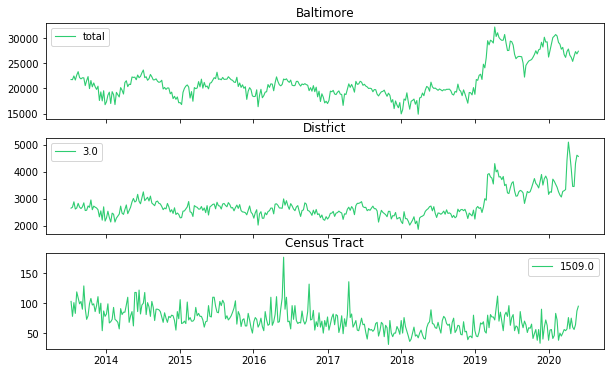

In [766]:
PLOT = [
        'total',
        '3.0', 
        '1509.0'
       ]
Title = ['Baltimore','District','Census Tract']

fig, axs = plt.subplots(len(PLOT), figsize=(10, 6), sharex=True)
ax.grid(alpha=0.75)

dts = preds.index

for i, group in enumerate(PLOT):
    axs[i].plot(dfhts[group], 
            lw=1.1, 
            color='#2ecc71', 
            alpha=1, 
            label=group)
#     axs[i].plot(preds[group], 
#             lw=1.1,
#             color='#e74c3c', 
#             alpha=0.8, 
#             label='Prediction')
    axs[i].legend()
    axs[i].set_title(Title[i])